CODE BLOCK: 1

In [ ]:
import torch
from model import Net
from utils import train_transforms,test_transforms
import torch.optim as optim
from torchvision import datasets

CODE BLOCK: 2

In [ ]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? False


device(type='cpu')

CODE BLOCK: 4

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 370424555.36it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 13971821.66it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 131440843.03it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7116372.35it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [ ]:
batch_size = 512  # Number of samples per batch during training and testing

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
# Dictionary specifying the configuration for the data loader

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
# Data loader for the test data with the specified configuration

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
# Data loader for the train data with the specified configuration


CODE BLOCK: 6

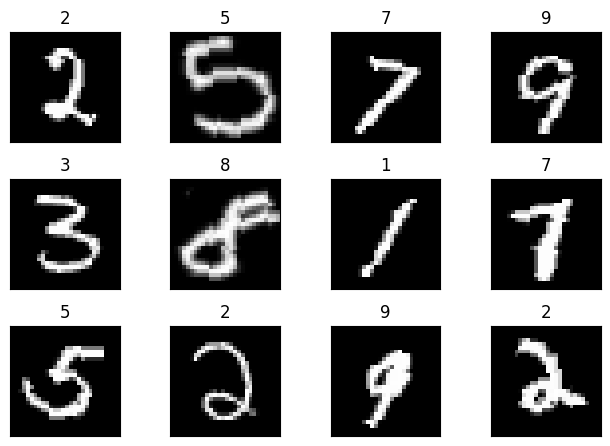

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 8

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1


  0%|          | 0/118 [00:00<?, ?it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.3034 Batch_id=4 Accuracy=9.84:   3%|▎         | 4/118 [00:07<02:41,  1.42s/it] 

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.3044 Batch_id=6 Accuracy=9.71:   5%|▌         | 6/118 [00:07<01:36,  1.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.3021 Batch_id=8 Accuracy=9.77:   7%|▋         | 8/118 [00:08<01:05,  1.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.3013 Batch_id=10 Accuracy=9.68:   8%|▊         | 10/118 [00:08<00:48,  2.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.3020 Batch_id=12 Accuracy=10.02:  10%|█         | 12/118 [00:08<00:37,  2.86it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.3010 Batch_id=14 Accuracy=10.30:  13%|█▎        | 15/118 [00:09<00:26,  3.91it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.3005 Batch_id=15 Accuracy=10.41:  14%|█▎        | 16/118 [00:09<00:25,  4.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.3020 Batch_id=18 Accuracy=10.46:  15%|█▌        | 18/118 [00:10<00:27,  3.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2999 Batch_id=20 Accuracy=10.77:  17%|█▋        | 20/118 [00:10<00:27,  3.53it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2993 Batch_id=22 Accuracy=10.86:  19%|█▊        | 22/118 [00:11<00:27,  3.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2989 Batch_id=24 Accuracy=10.98:  21%|██        | 25/118 [00:11<00:22,  4.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2992 Batch_id=26 Accuracy=11.02:  23%|██▎       | 27/118 [00:12<00:21,  4.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2978 Batch_id=28 Accuracy=11.09:  24%|██▎       | 28/118 [00:12<00:21,  4.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2982 Batch_id=30 Accuracy=11.31:  26%|██▋       | 31/118 [00:13<00:17,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2968 Batch_id=32 Accuracy=11.42:  27%|██▋       | 32/118 [00:13<00:17,  4.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2963 Batch_id=34 Accuracy=11.58:  29%|██▉       | 34/118 [00:13<00:16,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2962 Batch_id=36 Accuracy=11.70:  31%|███       | 36/118 [00:14<00:15,  5.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2959 Batch_id=38 Accuracy=11.87:  32%|███▏      | 38/118 [00:14<00:14,  5.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2956 Batch_id=40 Accuracy=12.04:  34%|███▍      | 40/118 [00:14<00:14,  5.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2963 Batch_id=42 Accuracy=12.11:  36%|███▌      | 42/118 [00:15<00:14,  5.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2961 Batch_id=44 Accuracy=12.10:  37%|███▋      | 44/118 [00:15<00:13,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2936 Batch_id=46 Accuracy=12.21:  39%|███▉      | 46/118 [00:15<00:13,  5.51it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2938 Batch_id=48 Accuracy=12.38:  41%|████      | 48/118 [00:16<00:12,  5.51it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2939 Batch_id=50 Accuracy=12.50:  42%|████▏     | 50/118 [00:16<00:12,  5.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2911 Batch_id=52 Accuracy=12.68:  44%|████▍     | 52/118 [00:16<00:12,  5.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2928 Batch_id=54 Accuracy=12.76:  46%|████▌     | 54/118 [00:17<00:11,  5.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2923 Batch_id=56 Accuracy=12.82:  47%|████▋     | 56/118 [00:17<00:11,  5.48it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2919 Batch_id=58 Accuracy=12.96:  49%|████▉     | 58/118 [00:17<00:10,  5.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2907 Batch_id=60 Accuracy=13.17:  51%|█████     | 60/118 [00:18<00:09,  5.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2908 Batch_id=62 Accuracy=13.26:  53%|█████▎    | 62/118 [00:18<00:09,  6.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2902 Batch_id=64 Accuracy=13.37:  54%|█████▍    | 64/118 [00:18<00:08,  6.07it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2876 Batch_id=66 Accuracy=13.54:  57%|█████▋    | 67/118 [00:19<00:07,  6.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2906 Batch_id=68 Accuracy=13.64:  58%|█████▊    | 69/118 [00:19<00:07,  6.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2891 Batch_id=69 Accuracy=13.72:  59%|█████▉    | 70/118 [00:19<00:07,  6.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2879 Batch_id=71 Accuracy=13.80:  60%|██████    | 71/118 [00:20<00:08,  5.64it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2862 Batch_id=73 Accuracy=13.96:  62%|██████▏   | 73/118 [00:20<00:08,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2858 Batch_id=75 Accuracy=14.08:  64%|██████▎   | 75/118 [00:20<00:07,  5.55it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2885 Batch_id=77 Accuracy=14.18:  66%|██████▌   | 78/118 [00:21<00:06,  6.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2868 Batch_id=78 Accuracy=14.22:  67%|██████▋   | 79/118 [00:21<00:06,  5.84it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2849 Batch_id=80 Accuracy=14.27:  69%|██████▊   | 81/118 [00:21<00:06,  6.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2850 Batch_id=82 Accuracy=14.39:  69%|██████▉   | 82/118 [00:22<00:06,  5.40it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2811 Batch_id=84 Accuracy=14.57:  71%|███████   | 84/118 [00:22<00:06,  4.97it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2814 Batch_id=86 Accuracy=14.68:  73%|███████▎  | 86/118 [00:23<00:07,  4.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2827 Batch_id=87 Accuracy=14.75:  75%|███████▍  | 88/118 [00:23<00:07,  4.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2815 Batch_id=89 Accuracy=14.87:  76%|███████▋  | 90/118 [00:24<00:07,  3.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2813 Batch_id=92 Accuracy=15.02:  79%|███████▉  | 93/118 [00:24<00:06,  3.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2811 Batch_id=94 Accuracy=15.09:  81%|████████  | 95/118 [00:25<00:05,  4.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2782 Batch_id=95 Accuracy=15.13:  81%|████████▏ | 96/118 [00:25<00:04,  4.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2812 Batch_id=97 Accuracy=15.21:  82%|████████▏ | 97/118 [00:25<00:04,  4.74it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2809 Batch_id=99 Accuracy=15.27:  85%|████████▍ | 100/118 [00:26<00:03,  5.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2777 Batch_id=101 Accuracy=15.34:  86%|████████▌ | 101/118 [00:26<00:03,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2753 Batch_id=103 Accuracy=15.46:  87%|████████▋ | 103/118 [00:26<00:02,  5.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2752 Batch_id=105 Accuracy=15.51:  89%|████████▉ | 105/118 [00:27<00:02,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2731 Batch_id=107 Accuracy=15.58:  91%|█████████ | 107/118 [00:27<00:02,  5.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2731 Batch_id=109 Accuracy=15.62:  92%|█████████▏| 109/118 [00:27<00:01,  5.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2698 Batch_id=111 Accuracy=15.70:  94%|█████████▍| 111/118 [00:28<00:01,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2718 Batch_id=113 Accuracy=15.75:  96%|█████████▌| 113/118 [00:28<00:00,  5.67it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2722 Batch_id=115 Accuracy=15.75:  97%|█████████▋| 115/118 [00:28<00:00,  5.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2633 Batch_id=117 Accuracy=15.81: 100%|██████████| 118/118 [00:29<00:00,  4.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=2.2695 Batch_id=1 Accuracy=18.07:   1%|          | 1/118 [00:00<00:55,  2.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2640 Batch_id=3 Accuracy=19.73:   3%|▎         | 3/118 [00:00<00:27,  4.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2623 Batch_id=5 Accuracy=20.18:   4%|▍         | 5/118 [00:01<00:23,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2589 Batch_id=7 Accuracy=21.04:   6%|▌         | 7/118 [00:01<00:20,  5.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2656 Batch_id=9 Accuracy=20.70:   8%|▊         | 10/118 [00:01<00:17,  6.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2576 Batch_id=10 Accuracy=21.00:   9%|▉         | 11/118 [00:02<00:18,  5.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2589 Batch_id=12 Accuracy=21.45:  11%|█         | 13/118 [00:02<00:19,  5.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2601 Batch_id=13 Accuracy=21.50:  12%|█▏        | 14/118 [00:02<00:21,  4.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2559 Batch_id=16 Accuracy=21.61:  14%|█▍        | 17/118 [00:03<00:23,  4.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2561 Batch_id=18 Accuracy=21.75:  15%|█▌        | 18/118 [00:04<00:29,  3.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2553 Batch_id=20 Accuracy=22.11:  18%|█▊        | 21/118 [00:04<00:24,  4.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2524 Batch_id=22 Accuracy=22.32:  19%|█▊        | 22/118 [00:05<00:30,  3.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2490 Batch_id=24 Accuracy=22.52:  20%|██        | 24/118 [00:05<00:24,  3.84it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2515 Batch_id=26 Accuracy=22.89:  22%|██▏       | 26/118 [00:05<00:21,  4.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2478 Batch_id=28 Accuracy=23.15:  24%|██▎       | 28/118 [00:06<00:18,  4.86it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2418 Batch_id=30 Accuracy=23.47:  25%|██▌       | 30/118 [00:06<00:16,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2418 Batch_id=32 Accuracy=23.73:  27%|██▋       | 32/118 [00:06<00:15,  5.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2351 Batch_id=34 Accuracy=24.11:  29%|██▉       | 34/118 [00:07<00:14,  5.64it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2302 Batch_id=36 Accuracy=24.40:  31%|███       | 36/118 [00:07<00:14,  5.55it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2288 Batch_id=38 Accuracy=24.76:  32%|███▏      | 38/118 [00:07<00:13,  5.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2267 Batch_id=40 Accuracy=25.05:  34%|███▍      | 40/118 [00:08<00:13,  5.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2248 Batch_id=42 Accuracy=25.26:  36%|███▌      | 42/118 [00:08<00:13,  5.62it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2205 Batch_id=44 Accuracy=25.44:  37%|███▋      | 44/118 [00:08<00:13,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2205 Batch_id=46 Accuracy=25.66:  39%|███▉      | 46/118 [00:09<00:12,  5.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2101 Batch_id=48 Accuracy=25.83:  41%|████      | 48/118 [00:09<00:12,  5.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2131 Batch_id=50 Accuracy=25.94:  42%|████▏     | 50/118 [00:10<00:11,  5.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2090 Batch_id=52 Accuracy=26.02:  44%|████▍     | 52/118 [00:10<00:11,  5.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1998 Batch_id=54 Accuracy=26.24:  46%|████▌     | 54/118 [00:10<00:11,  5.74it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.2110 Batch_id=56 Accuracy=26.34:  47%|████▋     | 56/118 [00:11<00:10,  5.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1928 Batch_id=58 Accuracy=26.52:  49%|████▉     | 58/118 [00:11<00:10,  5.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1792 Batch_id=60 Accuracy=26.81:  51%|█████     | 60/118 [00:11<00:10,  5.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1863 Batch_id=62 Accuracy=27.02:  53%|█████▎    | 62/118 [00:12<00:10,  5.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1774 Batch_id=64 Accuracy=27.29:  54%|█████▍    | 64/118 [00:12<00:09,  5.51it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1639 Batch_id=66 Accuracy=27.68:  56%|█████▌    | 66/118 [00:12<00:09,  5.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1691 Batch_id=68 Accuracy=27.91:  58%|█████▊    | 68/118 [00:13<00:08,  5.58it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1535 Batch_id=70 Accuracy=28.22:  59%|█████▉    | 70/118 [00:13<00:08,  5.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1469 Batch_id=72 Accuracy=28.54:  61%|██████    | 72/118 [00:13<00:08,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1453 Batch_id=74 Accuracy=28.90:  63%|██████▎   | 74/118 [00:14<00:07,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1314 Batch_id=76 Accuracy=29.23:  64%|██████▍   | 76/118 [00:14<00:07,  5.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1122 Batch_id=78 Accuracy=29.62:  66%|██████▌   | 78/118 [00:14<00:07,  5.65it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.1054 Batch_id=80 Accuracy=30.12:  68%|██████▊   | 80/118 [00:15<00:07,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.0826 Batch_id=82 Accuracy=30.61:  69%|██████▉   | 82/118 [00:15<00:07,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.0654 Batch_id=84 Accuracy=31.08:  71%|███████   | 84/118 [00:16<00:07,  4.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.0555 Batch_id=86 Accuracy=31.56:  73%|███████▎  | 86/118 [00:17<00:08,  3.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.0486 Batch_id=88 Accuracy=31.95:  75%|███████▍  | 88/118 [00:17<00:08,  3.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.0364 Batch_id=90 Accuracy=32.32:  76%|███████▋  | 90/118 [00:18<00:07,  3.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=2.0040 Batch_id=92 Accuracy=32.78:  78%|███████▊  | 92/118 [00:18<00:06,  4.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.9802 Batch_id=94 Accuracy=33.23:  80%|███████▉  | 94/118 [00:18<00:05,  4.58it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.9283 Batch_id=96 Accuracy=33.70:  81%|████████▏ | 96/118 [00:19<00:04,  4.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.9244 Batch_id=98 Accuracy=34.15:  83%|████████▎ | 98/118 [00:19<00:03,  5.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.8963 Batch_id=100 Accuracy=34.60:  85%|████████▍ | 100/118 [00:19<00:03,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.8813 Batch_id=102 Accuracy=35.11:  86%|████████▋ | 102/118 [00:20<00:02,  5.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.8438 Batch_id=104 Accuracy=35.61:  88%|████████▊ | 104/118 [00:20<00:02,  5.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.7939 Batch_id=106 Accuracy=36.13:  90%|████████▉ | 106/118 [00:20<00:02,  5.70it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.7247 Batch_id=108 Accuracy=36.65:  92%|█████████▏| 108/118 [00:21<00:01,  5.71it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.6821 Batch_id=110 Accuracy=37.21:  93%|█████████▎| 110/118 [00:21<00:01,  5.60it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.6476 Batch_id=112 Accuracy=37.73:  95%|█████████▍| 112/118 [00:22<00:01,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.5650 Batch_id=114 Accuracy=38.26:  97%|█████████▋| 114/118 [00:22<00:00,  5.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.5072 Batch_id=117 Accuracy=38.87: 100%|██████████| 118/118 [00:22<00:00,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=1.4357 Batch_id=1 Accuracy=67.68:   1%|          | 1/118 [00:00<00:52,  2.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.3738 Batch_id=3 Accuracy=68.46:   3%|▎         | 3/118 [00:00<00:27,  4.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.2535 Batch_id=5 Accuracy=69.73:   4%|▍         | 5/118 [00:01<00:24,  4.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.2217 Batch_id=7 Accuracy=70.19:   6%|▌         | 7/118 [00:01<00:22,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.1083 Batch_id=9 Accuracy=71.05:   8%|▊         | 9/118 [00:01<00:21,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.0846 Batch_id=11 Accuracy=71.47:   9%|▉         | 11/118 [00:02<00:22,  4.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=1.0367 Batch_id=13 Accuracy=71.68:  11%|█         | 13/118 [00:03<00:25,  4.17it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.9831 Batch_id=15 Accuracy=71.69:  13%|█▎        | 15/118 [00:03<00:25,  3.98it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.9660 Batch_id=17 Accuracy=71.97:  14%|█▍        | 17/118 [00:04<00:26,  3.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.9159 Batch_id=19 Accuracy=72.21:  16%|█▌        | 19/118 [00:04<00:27,  3.62it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.8701 Batch_id=21 Accuracy=72.44:  18%|█▊        | 21/118 [00:05<00:24,  3.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7213 Batch_id=23 Accuracy=72.75:  19%|█▉        | 23/118 [00:05<00:21,  4.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.8171 Batch_id=25 Accuracy=72.96:  21%|██        | 25/118 [00:05<00:19,  4.86it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7837 Batch_id=27 Accuracy=73.17:  23%|██▎       | 27/118 [00:06<00:17,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6838 Batch_id=29 Accuracy=73.42:  25%|██▍       | 29/118 [00:06<00:17,  5.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7431 Batch_id=31 Accuracy=73.75:  26%|██▋       | 31/118 [00:06<00:16,  5.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7584 Batch_id=33 Accuracy=73.99:  28%|██▊       | 33/118 [00:07<00:15,  5.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7108 Batch_id=35 Accuracy=74.28:  30%|██▉       | 35/118 [00:07<00:13,  5.97it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6630 Batch_id=37 Accuracy=74.40:  31%|███▏      | 37/118 [00:07<00:13,  5.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6498 Batch_id=39 Accuracy=74.58:  33%|███▎      | 39/118 [00:08<00:13,  5.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6639 Batch_id=41 Accuracy=74.80:  36%|███▌      | 42/118 [00:08<00:11,  6.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6977 Batch_id=43 Accuracy=75.03:  36%|███▋      | 43/118 [00:08<00:12,  5.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6856 Batch_id=45 Accuracy=75.20:  38%|███▊      | 45/118 [00:09<00:13,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7216 Batch_id=47 Accuracy=75.35:  40%|███▉      | 47/118 [00:09<00:12,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6251 Batch_id=49 Accuracy=75.52:  42%|████▏     | 49/118 [00:09<00:12,  5.48it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5585 Batch_id=51 Accuracy=75.68:  43%|████▎     | 51/118 [00:10<00:12,  5.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7228 Batch_id=53 Accuracy=75.78:  45%|████▍     | 53/118 [00:10<00:12,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6068 Batch_id=55 Accuracy=76.02:  47%|████▋     | 55/118 [00:11<00:14,  4.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6354 Batch_id=57 Accuracy=76.14:  48%|████▊     | 57/118 [00:11<00:14,  4.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7326 Batch_id=59 Accuracy=76.35:  51%|█████     | 60/118 [00:12<00:13,  4.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5938 Batch_id=60 Accuracy=76.46:  52%|█████▏    | 61/118 [00:12<00:15,  3.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5827 Batch_id=61 Accuracy=76.51:  53%|█████▎    | 62/118 [00:13<00:14,  3.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6032 Batch_id=63 Accuracy=76.68:  54%|█████▍    | 64/118 [00:13<00:12,  4.34it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5909 Batch_id=65 Accuracy=76.83:  55%|█████▌    | 65/118 [00:13<00:12,  4.34it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6895 Batch_id=67 Accuracy=76.89:  57%|█████▋    | 67/118 [00:14<00:10,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5670 Batch_id=69 Accuracy=76.98:  58%|█████▊    | 69/118 [00:14<00:09,  4.98it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5873 Batch_id=71 Accuracy=77.13:  60%|██████    | 71/118 [00:15<00:09,  4.97it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5487 Batch_id=73 Accuracy=77.26:  62%|██████▏   | 73/118 [00:15<00:10,  4.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6477 Batch_id=75 Accuracy=77.41:  64%|██████▎   | 75/118 [00:16<00:13,  3.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6541 Batch_id=77 Accuracy=77.48:  65%|██████▌   | 77/118 [00:17<00:14,  2.76it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5373 Batch_id=79 Accuracy=77.54:  67%|██████▋   | 79/118 [00:18<00:13,  2.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5985 Batch_id=81 Accuracy=77.61:  69%|██████▊   | 81/118 [00:18<00:11,  3.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7373 Batch_id=83 Accuracy=77.69:  70%|███████   | 83/118 [00:18<00:08,  3.91it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5667 Batch_id=85 Accuracy=77.74:  72%|███████▏  | 85/118 [00:19<00:07,  4.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5404 Batch_id=87 Accuracy=77.81:  74%|███████▎  | 87/118 [00:19<00:06,  4.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5646 Batch_id=89 Accuracy=77.92:  75%|███████▌  | 89/118 [00:19<00:05,  5.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5089 Batch_id=91 Accuracy=78.05:  77%|███████▋  | 91/118 [00:20<00:05,  5.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5652 Batch_id=93 Accuracy=78.18:  79%|███████▉  | 93/118 [00:20<00:04,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5739 Batch_id=95 Accuracy=78.23:  81%|████████  | 95/118 [00:20<00:04,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5418 Batch_id=97 Accuracy=78.34:  82%|████████▏ | 97/118 [00:21<00:03,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5533 Batch_id=99 Accuracy=78.40:  84%|████████▍ | 99/118 [00:21<00:03,  5.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5094 Batch_id=101 Accuracy=78.50:  86%|████████▌ | 101/118 [00:22<00:03,  5.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.6107 Batch_id=103 Accuracy=78.56:  87%|████████▋ | 103/118 [00:22<00:02,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5388 Batch_id=105 Accuracy=78.66:  89%|████████▉ | 105/118 [00:22<00:02,  5.34it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5456 Batch_id=107 Accuracy=78.77:  91%|█████████ | 107/118 [00:23<00:02,  5.34it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5260 Batch_id=109 Accuracy=78.89:  92%|█████████▏| 109/118 [00:23<00:01,  5.57it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4780 Batch_id=111 Accuracy=79.00:  94%|█████████▍| 111/118 [00:23<00:01,  5.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5793 Batch_id=113 Accuracy=79.10:  96%|█████████▌| 113/118 [00:24<00:00,  5.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5415 Batch_id=115 Accuracy=79.18:  97%|█████████▋| 115/118 [00:24<00:00,  5.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.7629 Batch_id=117 Accuracy=79.20: 100%|██████████| 118/118 [00:24<00:00,  4.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.6590 Batch_id=1 Accuracy=80.96:   1%|          | 1/118 [00:00<01:29,  1.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5779 Batch_id=2 Accuracy=81.18:   3%|▎         | 3/118 [00:01<00:42,  2.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4783 Batch_id=3 Accuracy=82.03:   3%|▎         | 4/118 [00:01<00:36,  3.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5611 Batch_id=4 Accuracy=82.03:   4%|▍         | 5/118 [00:01<00:38,  2.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4574 Batch_id=5 Accuracy=82.49:   5%|▌         | 6/118 [00:02<00:35,  3.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4563 Batch_id=8 Accuracy=82.96:   7%|▋         | 8/118 [00:02<00:28,  3.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5397 Batch_id=10 Accuracy=83.35:   9%|▉         | 11/118 [00:03<00:20,  5.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4933 Batch_id=12 Accuracy=83.43:  10%|█         | 12/118 [00:03<00:23,  4.53it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5359 Batch_id=14 Accuracy=83.37:  12%|█▏        | 14/118 [00:03<00:21,  4.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4978 Batch_id=16 Accuracy=83.62:  14%|█▎        | 16/118 [00:04<00:19,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4430 Batch_id=18 Accuracy=83.67:  15%|█▌        | 18/118 [00:04<00:18,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5314 Batch_id=20 Accuracy=83.70:  17%|█▋        | 20/118 [00:04<00:18,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5054 Batch_id=22 Accuracy=83.76:  19%|█▊        | 22/118 [00:05<00:17,  5.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4594 Batch_id=24 Accuracy=83.82:  20%|██        | 24/118 [00:05<00:17,  5.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5759 Batch_id=26 Accuracy=83.79:  22%|██▏       | 26/118 [00:05<00:16,  5.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3598 Batch_id=28 Accuracy=83.99:  24%|██▎       | 28/118 [00:06<00:15,  5.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5194 Batch_id=30 Accuracy=83.98:  25%|██▌       | 30/118 [00:06<00:15,  5.65it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4836 Batch_id=32 Accuracy=84.04:  27%|██▋       | 32/118 [00:06<00:15,  5.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5087 Batch_id=34 Accuracy=84.06:  29%|██▉       | 34/118 [00:07<00:15,  5.55it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4323 Batch_id=36 Accuracy=84.18:  31%|███       | 36/118 [00:07<00:14,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4538 Batch_id=38 Accuracy=84.25:  32%|███▏      | 38/118 [00:08<00:14,  5.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4411 Batch_id=40 Accuracy=84.39:  34%|███▍      | 40/118 [00:08<00:13,  5.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4194 Batch_id=42 Accuracy=84.48:  36%|███▌      | 42/118 [00:08<00:13,  5.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4952 Batch_id=44 Accuracy=84.53:  37%|███▋      | 44/118 [00:09<00:12,  5.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5052 Batch_id=46 Accuracy=84.59:  39%|███▉      | 46/118 [00:09<00:12,  5.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4761 Batch_id=48 Accuracy=84.66:  41%|████      | 48/118 [00:09<00:12,  5.64it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4976 Batch_id=50 Accuracy=84.68:  42%|████▏     | 50/118 [00:10<00:12,  5.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3847 Batch_id=52 Accuracy=84.84:  44%|████▍     | 52/118 [00:10<00:11,  5.70it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4616 Batch_id=54 Accuracy=84.94:  46%|████▌     | 54/118 [00:10<00:11,  5.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4905 Batch_id=56 Accuracy=84.93:  47%|████▋     | 56/118 [00:11<00:10,  5.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4287 Batch_id=58 Accuracy=85.07:  50%|█████     | 59/118 [00:11<00:09,  6.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4160 Batch_id=60 Accuracy=85.17:  51%|█████     | 60/118 [00:11<00:10,  5.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4980 Batch_id=62 Accuracy=85.19:  53%|█████▎    | 62/118 [00:12<00:10,  5.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3686 Batch_id=64 Accuracy=85.32:  54%|█████▍    | 64/118 [00:12<00:11,  4.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3847 Batch_id=65 Accuracy=85.39:  56%|█████▌    | 66/118 [00:13<00:10,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4089 Batch_id=67 Accuracy=85.46:  58%|█████▊    | 68/118 [00:13<00:11,  4.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4787 Batch_id=68 Accuracy=85.49:  58%|█████▊    | 69/118 [00:13<00:11,  4.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5258 Batch_id=69 Accuracy=85.48:  59%|█████▉    | 70/118 [00:14<00:12,  3.78it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4696 Batch_id=70 Accuracy=85.49:  60%|██████    | 71/118 [00:14<00:12,  3.64it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4130 Batch_id=71 Accuracy=85.52:  61%|██████    | 72/118 [00:14<00:13,  3.53it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4315 Batch_id=72 Accuracy=85.54:  62%|██████▏   | 73/118 [00:15<00:12,  3.74it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4375 Batch_id=73 Accuracy=85.55:  63%|██████▎   | 74/118 [00:15<00:12,  3.60it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4260 Batch_id=76 Accuracy=85.52:  65%|██████▌   | 77/118 [00:15<00:08,  4.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4382 Batch_id=77 Accuracy=85.53:  66%|██████▌   | 78/118 [00:16<00:08,  4.70it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4276 Batch_id=79 Accuracy=85.60:  68%|██████▊   | 80/118 [00:16<00:07,  5.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3978 Batch_id=81 Accuracy=85.66:  69%|██████▉   | 82/118 [00:16<00:06,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4769 Batch_id=83 Accuracy=85.67:  71%|███████   | 84/118 [00:17<00:06,  5.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4220 Batch_id=84 Accuracy=85.68:  72%|███████▏  | 85/118 [00:17<00:06,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4703 Batch_id=86 Accuracy=85.72:  74%|███████▎  | 87/118 [00:17<00:05,  5.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4253 Batch_id=88 Accuracy=85.73:  75%|███████▌  | 89/118 [00:18<00:05,  5.65it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4138 Batch_id=90 Accuracy=85.78:  77%|███████▋  | 91/118 [00:18<00:04,  5.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4295 Batch_id=92 Accuracy=85.83:  79%|███████▉  | 93/118 [00:18<00:04,  5.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3559 Batch_id=94 Accuracy=85.91:  80%|███████▉  | 94/118 [00:19<00:04,  4.97it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4538 Batch_id=96 Accuracy=85.95:  81%|████████▏ | 96/118 [00:19<00:04,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3801 Batch_id=98 Accuracy=86.00:  83%|████████▎ | 98/118 [00:19<00:03,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4549 Batch_id=100 Accuracy=86.04:  85%|████████▍ | 100/118 [00:20<00:03,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3604 Batch_id=102 Accuracy=86.11:  86%|████████▋ | 102/118 [00:20<00:02,  5.33it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.5054 Batch_id=104 Accuracy=86.09:  88%|████████▊ | 104/118 [00:20<00:02,  5.57it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4447 Batch_id=106 Accuracy=86.13:  90%|████████▉ | 106/118 [00:21<00:02,  5.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3922 Batch_id=108 Accuracy=86.17:  92%|█████████▏| 108/118 [00:21<00:01,  5.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3556 Batch_id=110 Accuracy=86.23:  94%|█████████▍| 111/118 [00:22<00:01,  6.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4326 Batch_id=112 Accuracy=86.24:  95%|█████████▍| 112/118 [00:22<00:01,  5.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3894 Batch_id=114 Accuracy=86.26:  97%|█████████▋| 114/118 [00:22<00:00,  5.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4319 Batch_id=117 Accuracy=86.31: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.3248 Batch_id=1 Accuracy=89.06:   1%|          | 1/118 [00:00<01:28,  1.33it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4630 Batch_id=3 Accuracy=87.94:   3%|▎         | 3/118 [00:01<00:41,  2.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4314 Batch_id=5 Accuracy=87.83:   4%|▍         | 5/118 [00:01<00:28,  3.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3723 Batch_id=7 Accuracy=87.57:   6%|▌         | 7/118 [00:01<00:24,  4.55it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4433 Batch_id=9 Accuracy=87.66:   8%|▊         | 9/118 [00:02<00:23,  4.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4021 Batch_id=11 Accuracy=87.63:   9%|▉         | 11/118 [00:02<00:21,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4835 Batch_id=13 Accuracy=87.65:  11%|█         | 13/118 [00:02<00:19,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4171 Batch_id=15 Accuracy=87.78:  13%|█▎        | 15/118 [00:03<00:20,  5.07it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4506 Batch_id=17 Accuracy=87.67:  14%|█▍        | 17/118 [00:03<00:19,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3580 Batch_id=19 Accuracy=87.78:  16%|█▌        | 19/118 [00:04<00:18,  5.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4062 Batch_id=21 Accuracy=87.53:  18%|█▊        | 21/118 [00:04<00:18,  5.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3363 Batch_id=23 Accuracy=87.64:  19%|█▉        | 23/118 [00:04<00:17,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3915 Batch_id=25 Accuracy=87.68:  21%|██        | 25/118 [00:05<00:17,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4259 Batch_id=27 Accuracy=87.67:  23%|██▎       | 27/118 [00:05<00:16,  5.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3646 Batch_id=29 Accuracy=87.73:  25%|██▍       | 29/118 [00:06<00:16,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4273 Batch_id=31 Accuracy=87.84:  26%|██▋       | 31/118 [00:06<00:16,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3260 Batch_id=33 Accuracy=87.91:  28%|██▊       | 33/118 [00:06<00:15,  5.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3668 Batch_id=35 Accuracy=87.96:  30%|██▉       | 35/118 [00:07<00:15,  5.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3298 Batch_id=37 Accuracy=87.97:  31%|███▏      | 37/118 [00:07<00:14,  5.53it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3664 Batch_id=39 Accuracy=88.04:  33%|███▎      | 39/118 [00:07<00:13,  5.67it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4089 Batch_id=41 Accuracy=88.10:  35%|███▍      | 41/118 [00:08<00:13,  5.76it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.4083 Batch_id=43 Accuracy=88.11:  36%|███▋      | 43/118 [00:08<00:12,  5.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3041 Batch_id=45 Accuracy=88.21:  38%|███▊      | 45/118 [00:08<00:12,  5.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3110 Batch_id=47 Accuracy=88.31:  40%|███▉      | 47/118 [00:09<00:12,  5.62it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3281 Batch_id=49 Accuracy=88.39:  42%|████▏     | 49/118 [00:09<00:12,  5.62it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3505 Batch_id=51 Accuracy=88.47:  43%|████▎     | 51/118 [00:09<00:11,  5.67it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3405 Batch_id=53 Accuracy=88.52:  45%|████▍     | 53/118 [00:10<00:11,  5.71it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3491 Batch_id=55 Accuracy=88.59:  47%|████▋     | 55/118 [00:10<00:10,  5.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3270 Batch_id=57 Accuracy=88.62:  48%|████▊     | 57/118 [00:10<00:10,  5.76it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3186 Batch_id=59 Accuracy=88.68:  50%|█████     | 59/118 [00:11<00:10,  5.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3274 Batch_id=61 Accuracy=88.70:  52%|█████▏    | 61/118 [00:11<00:12,  4.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3786 Batch_id=63 Accuracy=88.71:  53%|█████▎    | 63/118 [00:12<00:13,  4.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2969 Batch_id=64 Accuracy=88.77:  55%|█████▌    | 65/118 [00:12<00:12,  4.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3732 Batch_id=65 Accuracy=88.77:  56%|█████▌    | 66/118 [00:13<00:11,  4.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3063 Batch_id=66 Accuracy=88.79:  57%|█████▋    | 67/118 [00:13<00:12,  3.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3167 Batch_id=67 Accuracy=88.83:  58%|█████▊    | 68/118 [00:13<00:12,  4.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3734 Batch_id=69 Accuracy=88.85:  59%|█████▉    | 70/118 [00:14<00:11,  4.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3074 Batch_id=71 Accuracy=88.88:  61%|██████    | 72/118 [00:14<00:09,  4.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3683 Batch_id=72 Accuracy=88.88:  62%|██████▏   | 73/118 [00:14<00:09,  4.78it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3115 Batch_id=74 Accuracy=88.86:  64%|██████▎   | 75/118 [00:15<00:08,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3013 Batch_id=75 Accuracy=88.89:  64%|██████▍   | 76/118 [00:15<00:08,  5.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3097 Batch_id=77 Accuracy=88.90:  66%|██████▌   | 78/118 [00:15<00:06,  5.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3154 Batch_id=79 Accuracy=88.94:  68%|██████▊   | 80/118 [00:16<00:06,  5.70it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3485 Batch_id=81 Accuracy=88.98:  69%|██████▊   | 81/118 [00:16<00:07,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3203 Batch_id=83 Accuracy=89.02:  70%|███████   | 83/118 [00:16<00:07,  4.93it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3604 Batch_id=85 Accuracy=89.08:  72%|███████▏  | 85/118 [00:17<00:06,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2816 Batch_id=87 Accuracy=89.14:  74%|███████▎  | 87/118 [00:17<00:05,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3567 Batch_id=89 Accuracy=89.14:  75%|███████▌  | 89/118 [00:17<00:05,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3828 Batch_id=91 Accuracy=89.12:  77%|███████▋  | 91/118 [00:18<00:04,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3610 Batch_id=93 Accuracy=89.10:  79%|███████▉  | 93/118 [00:18<00:04,  5.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3873 Batch_id=95 Accuracy=89.11:  81%|████████  | 95/118 [00:18<00:04,  5.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3578 Batch_id=97 Accuracy=89.10:  82%|████████▏ | 97/118 [00:19<00:03,  5.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3492 Batch_id=99 Accuracy=89.09:  84%|████████▍ | 99/118 [00:19<00:03,  5.57it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3526 Batch_id=101 Accuracy=89.13:  86%|████████▌ | 101/118 [00:19<00:03,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3307 Batch_id=103 Accuracy=89.12:  87%|████████▋ | 103/118 [00:20<00:02,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3146 Batch_id=105 Accuracy=89.15:  89%|████████▉ | 105/118 [00:20<00:02,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3822 Batch_id=107 Accuracy=89.16:  91%|█████████ | 107/118 [00:21<00:01,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2963 Batch_id=109 Accuracy=89.21:  92%|█████████▏| 109/118 [00:21<00:01,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3266 Batch_id=111 Accuracy=89.23:  94%|█████████▍| 111/118 [00:21<00:01,  5.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3669 Batch_id=113 Accuracy=89.25:  96%|█████████▌| 113/118 [00:22<00:00,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3572 Batch_id=115 Accuracy=89.28:  97%|█████████▋| 115/118 [00:22<00:00,  5.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3126 Batch_id=117 Accuracy=89.29: 100%|██████████| 118/118 [00:22<00:00,  5.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.3549 Batch_id=1 Accuracy=89.94:   1%|          | 1/118 [00:00<00:55,  2.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2998 Batch_id=3 Accuracy=90.28:   3%|▎         | 3/118 [00:00<00:27,  4.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2707 Batch_id=5 Accuracy=90.53:   4%|▍         | 5/118 [00:01<00:24,  4.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3175 Batch_id=7 Accuracy=90.70:   7%|▋         | 8/118 [00:01<00:19,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3918 Batch_id=8 Accuracy=90.36:   8%|▊         | 9/118 [00:01<00:20,  5.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3061 Batch_id=10 Accuracy=90.36:   9%|▉         | 11/118 [00:02<00:19,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2791 Batch_id=12 Accuracy=90.50:  11%|█         | 13/118 [00:02<00:18,  5.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2965 Batch_id=14 Accuracy=90.48:  13%|█▎        | 15/118 [00:02<00:17,  5.97it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2705 Batch_id=16 Accuracy=90.51:  14%|█▍        | 17/118 [00:03<00:18,  5.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2948 Batch_id=17 Accuracy=90.58:  15%|█▌        | 18/118 [00:03<00:19,  5.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3360 Batch_id=20 Accuracy=90.63:  18%|█▊        | 21/118 [00:04<00:16,  5.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2578 Batch_id=22 Accuracy=90.60:  19%|█▊        | 22/118 [00:04<00:20,  4.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3541 Batch_id=24 Accuracy=90.49:  20%|██        | 24/118 [00:04<00:19,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2278 Batch_id=26 Accuracy=90.54:  22%|██▏       | 26/118 [00:05<00:18,  4.96it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3181 Batch_id=28 Accuracy=90.52:  24%|██▎       | 28/118 [00:05<00:18,  4.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2839 Batch_id=30 Accuracy=90.59:  25%|██▌       | 30/118 [00:05<00:16,  5.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3334 Batch_id=32 Accuracy=90.56:  27%|██▋       | 32/118 [00:06<00:16,  5.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2496 Batch_id=34 Accuracy=90.64:  29%|██▉       | 34/118 [00:06<00:16,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3435 Batch_id=36 Accuracy=90.61:  31%|███       | 36/118 [00:07<00:16,  4.96it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3158 Batch_id=38 Accuracy=90.69:  32%|███▏      | 38/118 [00:07<00:15,  5.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3031 Batch_id=40 Accuracy=90.73:  34%|███▍      | 40/118 [00:07<00:14,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3273 Batch_id=42 Accuracy=90.73:  36%|███▌      | 42/118 [00:08<00:13,  5.57it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2529 Batch_id=44 Accuracy=90.78:  37%|███▋      | 44/118 [00:08<00:13,  5.40it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2711 Batch_id=46 Accuracy=90.86:  39%|███▉      | 46/118 [00:08<00:13,  5.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2611 Batch_id=48 Accuracy=90.91:  41%|████      | 48/118 [00:09<00:13,  5.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2389 Batch_id=50 Accuracy=90.94:  42%|████▏     | 50/118 [00:09<00:12,  5.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2980 Batch_id=52 Accuracy=90.96:  44%|████▍     | 52/118 [00:10<00:14,  4.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2985 Batch_id=54 Accuracy=90.96:  46%|████▌     | 54/118 [00:10<00:15,  4.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2319 Batch_id=56 Accuracy=91.02:  47%|████▋     | 56/118 [00:11<00:15,  3.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2804 Batch_id=58 Accuracy=90.99:  49%|████▉     | 58/118 [00:11<00:14,  4.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2893 Batch_id=60 Accuracy=91.01:  51%|█████     | 60/118 [00:12<00:14,  3.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2015 Batch_id=62 Accuracy=91.04:  53%|█████▎    | 62/118 [00:12<00:14,  3.98it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3560 Batch_id=64 Accuracy=91.01:  54%|█████▍    | 64/118 [00:13<00:12,  4.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3017 Batch_id=66 Accuracy=91.05:  56%|█████▌    | 66/118 [00:13<00:11,  4.65it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3269 Batch_id=68 Accuracy=91.04:  58%|█████▊    | 68/118 [00:13<00:10,  4.93it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2779 Batch_id=70 Accuracy=91.03:  59%|█████▉    | 70/118 [00:14<00:09,  4.98it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3380 Batch_id=72 Accuracy=91.03:  61%|██████    | 72/118 [00:14<00:08,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2889 Batch_id=74 Accuracy=91.05:  63%|██████▎   | 74/118 [00:15<00:08,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2601 Batch_id=76 Accuracy=91.06:  64%|██████▍   | 76/118 [00:15<00:08,  5.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2350 Batch_id=78 Accuracy=91.11:  66%|██████▌   | 78/118 [00:15<00:07,  5.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2858 Batch_id=80 Accuracy=91.12:  68%|██████▊   | 80/118 [00:16<00:06,  5.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2353 Batch_id=82 Accuracy=91.13:  69%|██████▉   | 82/118 [00:16<00:06,  5.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2475 Batch_id=84 Accuracy=91.16:  71%|███████   | 84/118 [00:16<00:06,  5.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2559 Batch_id=86 Accuracy=91.18:  73%|███████▎  | 86/118 [00:17<00:05,  5.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3228 Batch_id=88 Accuracy=91.20:  75%|███████▍  | 88/118 [00:17<00:05,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3610 Batch_id=90 Accuracy=91.21:  76%|███████▋  | 90/118 [00:17<00:04,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3182 Batch_id=92 Accuracy=91.22:  78%|███████▊  | 92/118 [00:18<00:04,  5.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2685 Batch_id=94 Accuracy=91.23:  80%|███████▉  | 94/118 [00:18<00:04,  5.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2655 Batch_id=96 Accuracy=91.24:  81%|████████▏ | 96/118 [00:19<00:03,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3054 Batch_id=98 Accuracy=91.25:  83%|████████▎ | 98/118 [00:19<00:03,  5.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2964 Batch_id=100 Accuracy=91.27:  85%|████████▍ | 100/118 [00:19<00:03,  5.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2517 Batch_id=102 Accuracy=91.28:  86%|████████▋ | 102/118 [00:20<00:02,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3060 Batch_id=104 Accuracy=91.28:  88%|████████▊ | 104/118 [00:20<00:02,  5.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3436 Batch_id=106 Accuracy=91.25:  90%|████████▉ | 106/118 [00:20<00:02,  5.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2433 Batch_id=108 Accuracy=91.26:  92%|█████████▏| 108/118 [00:21<00:01,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2885 Batch_id=110 Accuracy=91.29:  93%|█████████▎| 110/118 [00:21<00:01,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3032 Batch_id=112 Accuracy=91.28:  95%|█████████▍| 112/118 [00:21<00:01,  5.60it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2400 Batch_id=114 Accuracy=91.29:  97%|█████████▋| 114/118 [00:22<00:00,  5.76it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2841 Batch_id=117 Accuracy=91.28: 100%|██████████| 118/118 [00:22<00:00,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.2817 Batch_id=1 Accuracy=90.04:   1%|          | 1/118 [00:00<00:59,  1.96it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2501 Batch_id=3 Accuracy=91.41:   3%|▎         | 3/118 [00:00<00:30,  3.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2681 Batch_id=5 Accuracy=91.76:   4%|▍         | 5/118 [00:01<00:25,  4.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2521 Batch_id=7 Accuracy=91.92:   6%|▌         | 7/118 [00:01<00:22,  4.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2986 Batch_id=9 Accuracy=91.97:   8%|▊         | 9/118 [00:01<00:21,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2071 Batch_id=11 Accuracy=92.06:  10%|█         | 12/118 [00:02<00:18,  5.65it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2790 Batch_id=13 Accuracy=91.84:  12%|█▏        | 14/118 [00:02<00:18,  5.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2951 Batch_id=15 Accuracy=91.78:  14%|█▎        | 16/118 [00:03<00:17,  5.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2932 Batch_id=16 Accuracy=91.73:  14%|█▍        | 17/118 [00:03<00:18,  5.34it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2492 Batch_id=18 Accuracy=91.82:  16%|█▌        | 19/118 [00:03<00:18,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2643 Batch_id=20 Accuracy=91.91:  18%|█▊        | 21/118 [00:04<00:18,  5.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2709 Batch_id=22 Accuracy=91.91:  19%|█▉        | 23/118 [00:04<00:17,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2462 Batch_id=23 Accuracy=91.97:  20%|██        | 24/118 [00:04<00:17,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2375 Batch_id=25 Accuracy=92.11:  22%|██▏       | 26/118 [00:05<00:16,  5.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2174 Batch_id=28 Accuracy=92.15:  25%|██▍       | 29/118 [00:05<00:15,  5.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2547 Batch_id=30 Accuracy=92.25:  25%|██▌       | 30/118 [00:05<00:18,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2520 Batch_id=32 Accuracy=92.27:  27%|██▋       | 32/118 [00:06<00:16,  5.07it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2497 Batch_id=34 Accuracy=92.28:  30%|██▉       | 35/118 [00:06<00:14,  5.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2767 Batch_id=36 Accuracy=92.27:  31%|███▏      | 37/118 [00:07<00:13,  5.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2137 Batch_id=38 Accuracy=92.31:  32%|███▏      | 38/118 [00:07<00:15,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2389 Batch_id=40 Accuracy=92.32:  34%|███▍      | 40/118 [00:07<00:15,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2676 Batch_id=42 Accuracy=92.30:  36%|███▌      | 42/118 [00:08<00:14,  5.17it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2625 Batch_id=44 Accuracy=92.26:  37%|███▋      | 44/118 [00:08<00:14,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2553 Batch_id=46 Accuracy=92.24:  39%|███▉      | 46/118 [00:09<00:14,  4.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2966 Batch_id=48 Accuracy=92.21:  41%|████      | 48/118 [00:09<00:16,  4.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2447 Batch_id=50 Accuracy=92.21:  42%|████▏     | 50/118 [00:10<00:17,  3.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2101 Batch_id=52 Accuracy=92.26:  44%|████▍     | 52/118 [00:10<00:18,  3.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3169 Batch_id=54 Accuracy=92.25:  46%|████▌     | 54/118 [00:11<00:18,  3.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1694 Batch_id=56 Accuracy=92.32:  47%|████▋     | 56/118 [00:11<00:16,  3.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2429 Batch_id=58 Accuracy=92.32:  49%|████▉     | 58/118 [00:12<00:14,  4.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2312 Batch_id=60 Accuracy=92.32:  51%|█████     | 60/118 [00:12<00:13,  4.40it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2220 Batch_id=62 Accuracy=92.32:  53%|█████▎    | 62/118 [00:13<00:12,  4.57it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2123 Batch_id=64 Accuracy=92.33:  54%|█████▍    | 64/118 [00:13<00:11,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2479 Batch_id=66 Accuracy=92.32:  56%|█████▌    | 66/118 [00:13<00:10,  4.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2653 Batch_id=68 Accuracy=92.32:  58%|█████▊    | 68/118 [00:14<00:09,  5.17it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2259 Batch_id=70 Accuracy=92.33:  59%|█████▉    | 70/118 [00:14<00:09,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2493 Batch_id=72 Accuracy=92.34:  61%|██████    | 72/118 [00:14<00:08,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2052 Batch_id=74 Accuracy=92.37:  63%|██████▎   | 74/118 [00:15<00:08,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2055 Batch_id=76 Accuracy=92.36:  64%|██████▍   | 76/118 [00:15<00:07,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2391 Batch_id=78 Accuracy=92.37:  66%|██████▌   | 78/118 [00:16<00:07,  5.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2733 Batch_id=80 Accuracy=92.36:  68%|██████▊   | 80/118 [00:16<00:07,  5.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3103 Batch_id=82 Accuracy=92.31:  69%|██████▉   | 82/118 [00:16<00:06,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2365 Batch_id=84 Accuracy=92.29:  71%|███████   | 84/118 [00:17<00:06,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2183 Batch_id=86 Accuracy=92.30:  73%|███████▎  | 86/118 [00:17<00:06,  5.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2288 Batch_id=88 Accuracy=92.31:  75%|███████▍  | 88/118 [00:17<00:05,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1988 Batch_id=90 Accuracy=92.35:  76%|███████▋  | 90/118 [00:18<00:05,  5.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2387 Batch_id=92 Accuracy=92.37:  78%|███████▊  | 92/118 [00:18<00:04,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2023 Batch_id=94 Accuracy=92.38:  80%|███████▉  | 94/118 [00:18<00:04,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2227 Batch_id=96 Accuracy=92.38:  81%|████████▏ | 96/118 [00:19<00:03,  5.57it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2157 Batch_id=98 Accuracy=92.42:  83%|████████▎ | 98/118 [00:19<00:03,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1750 Batch_id=100 Accuracy=92.44:  85%|████████▍ | 100/118 [00:20<00:03,  5.67it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2157 Batch_id=102 Accuracy=92.47:  86%|████████▋ | 102/118 [00:20<00:02,  5.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2298 Batch_id=104 Accuracy=92.48:  89%|████████▉ | 105/118 [00:20<00:02,  6.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2603 Batch_id=106 Accuracy=92.50:  90%|████████▉ | 106/118 [00:21<00:02,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1744 Batch_id=108 Accuracy=92.54:  92%|█████████▏| 108/118 [00:21<00:01,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2060 Batch_id=110 Accuracy=92.57:  93%|█████████▎| 110/118 [00:22<00:01,  4.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2490 Batch_id=112 Accuracy=92.59:  95%|█████████▍| 112/118 [00:22<00:01,  4.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2764 Batch_id=114 Accuracy=92.61:  97%|█████████▋| 114/118 [00:23<00:01,  4.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1479 Batch_id=117 Accuracy=92.62:  98%|█████████▊| 116/118 [00:23<00:00,  4.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


Train: Loss=0.1479 Batch_id=117 Accuracy=92.62: 100%|██████████| 118/118 [00:23<00:00,  4.97it/s]


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1836 Batch_id=1 Accuracy=94.53:   1%|          | 1/118 [00:00<00:55,  2.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1854 Batch_id=3 Accuracy=94.24:   3%|▎         | 4/118 [00:00<00:22,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2659 Batch_id=5 Accuracy=93.46:   5%|▌         | 6/118 [00:01<00:20,  5.48it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2859 Batch_id=7 Accuracy=92.99:   6%|▌         | 7/118 [00:01<00:22,  4.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1874 Batch_id=9 Accuracy=93.24:   8%|▊         | 9/118 [00:01<00:21,  4.96it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2019 Batch_id=11 Accuracy=93.36:   9%|▉         | 11/118 [00:02<00:20,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2241 Batch_id=13 Accuracy=93.36:  11%|█         | 13/118 [00:02<00:20,  5.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1968 Batch_id=15 Accuracy=93.53:  14%|█▎        | 16/118 [00:03<00:17,  5.84it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1787 Batch_id=16 Accuracy=93.57:  14%|█▍        | 17/118 [00:03<00:18,  5.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2418 Batch_id=19 Accuracy=93.37:  16%|█▌        | 19/118 [00:03<00:18,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1573 Batch_id=20 Accuracy=93.45:  18%|█▊        | 21/118 [00:04<00:18,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2034 Batch_id=23 Accuracy=93.34:  20%|██        | 24/118 [00:04<00:16,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2482 Batch_id=25 Accuracy=93.43:  22%|██▏       | 26/118 [00:05<00:15,  5.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2719 Batch_id=27 Accuracy=93.39:  23%|██▎       | 27/118 [00:05<00:18,  4.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2755 Batch_id=29 Accuracy=93.39:  25%|██▍       | 29/118 [00:05<00:17,  5.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2201 Batch_id=31 Accuracy=93.37:  26%|██▋       | 31/118 [00:06<00:16,  5.33it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2637 Batch_id=33 Accuracy=93.35:  28%|██▊       | 33/118 [00:06<00:15,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2037 Batch_id=35 Accuracy=93.39:  31%|███       | 36/118 [00:06<00:14,  5.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1894 Batch_id=36 Accuracy=93.41:  31%|███▏      | 37/118 [00:07<00:14,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2272 Batch_id=37 Accuracy=93.42:  32%|███▏      | 38/118 [00:07<00:15,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2168 Batch_id=39 Accuracy=93.44:  34%|███▍      | 40/118 [00:07<00:16,  4.78it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1832 Batch_id=41 Accuracy=93.54:  36%|███▌      | 42/118 [00:08<00:17,  4.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2033 Batch_id=43 Accuracy=93.51:  37%|███▋      | 44/118 [00:09<00:19,  3.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2174 Batch_id=44 Accuracy=93.49:  38%|███▊      | 45/118 [00:09<00:21,  3.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2195 Batch_id=45 Accuracy=93.47:  39%|███▉      | 46/118 [00:09<00:22,  3.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1957 Batch_id=46 Accuracy=93.48:  40%|███▉      | 47/118 [00:10<00:21,  3.33it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2036 Batch_id=48 Accuracy=93.51:  42%|████▏     | 49/118 [00:10<00:17,  3.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2177 Batch_id=49 Accuracy=93.50:  42%|████▏     | 50/118 [00:10<00:17,  3.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2079 Batch_id=51 Accuracy=93.54:  44%|████▍     | 52/118 [00:11<00:14,  4.60it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2386 Batch_id=53 Accuracy=93.51:  45%|████▍     | 53/118 [00:11<00:14,  4.53it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2086 Batch_id=55 Accuracy=93.51:  47%|████▋     | 56/118 [00:11<00:11,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1579 Batch_id=57 Accuracy=93.57:  49%|████▉     | 58/118 [00:12<00:11,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1871 Batch_id=58 Accuracy=93.55:  50%|█████     | 59/118 [00:12<00:12,  4.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2060 Batch_id=60 Accuracy=93.58:  52%|█████▏    | 61/118 [00:12<00:11,  4.78it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2221 Batch_id=63 Accuracy=93.59:  54%|█████▍    | 64/118 [00:13<00:10,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1620 Batch_id=65 Accuracy=93.60:  56%|█████▌    | 66/118 [00:13<00:09,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1734 Batch_id=67 Accuracy=93.61:  57%|█████▋    | 67/118 [00:14<00:11,  4.48it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2218 Batch_id=69 Accuracy=93.60:  58%|█████▊    | 69/118 [00:14<00:09,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1709 Batch_id=71 Accuracy=93.58:  60%|██████    | 71/118 [00:15<00:09,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2217 Batch_id=73 Accuracy=93.59:  62%|██████▏   | 73/118 [00:15<00:08,  5.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1857 Batch_id=75 Accuracy=93.60:  64%|██████▎   | 75/118 [00:15<00:07,  5.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1813 Batch_id=77 Accuracy=93.62:  66%|██████▌   | 78/118 [00:16<00:06,  5.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1938 Batch_id=78 Accuracy=93.62:  67%|██████▋   | 79/118 [00:16<00:07,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2115 Batch_id=80 Accuracy=93.62:  69%|██████▊   | 81/118 [00:16<00:06,  5.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1921 Batch_id=83 Accuracy=93.65:  71%|███████   | 84/118 [00:17<00:05,  5.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2065 Batch_id=85 Accuracy=93.66:  72%|███████▏  | 85/118 [00:17<00:06,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1798 Batch_id=87 Accuracy=93.68:  74%|███████▎  | 87/118 [00:17<00:06,  5.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1999 Batch_id=89 Accuracy=93.70:  75%|███████▌  | 89/118 [00:18<00:05,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1956 Batch_id=91 Accuracy=93.70:  77%|███████▋  | 91/118 [00:18<00:05,  5.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1896 Batch_id=93 Accuracy=93.70:  79%|███████▉  | 93/118 [00:19<00:04,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1953 Batch_id=95 Accuracy=93.71:  81%|████████  | 95/118 [00:19<00:04,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1993 Batch_id=97 Accuracy=93.71:  82%|████████▏ | 97/118 [00:19<00:03,  5.48it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1770 Batch_id=99 Accuracy=93.73:  84%|████████▍ | 99/118 [00:20<00:03,  5.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1454 Batch_id=101 Accuracy=93.75:  86%|████████▋ | 102/118 [00:20<00:02,  5.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1868 Batch_id=103 Accuracy=93.76:  87%|████████▋ | 103/118 [00:21<00:03,  4.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2063 Batch_id=105 Accuracy=93.78:  90%|████████▉ | 106/118 [00:21<00:02,  4.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1873 Batch_id=107 Accuracy=93.81:  92%|█████████▏| 108/118 [00:22<00:02,  3.84it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1989 Batch_id=109 Accuracy=93.81:  93%|█████████▎| 110/118 [00:23<00:02,  3.67it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1896 Batch_id=111 Accuracy=93.82:  94%|█████████▍| 111/118 [00:23<00:02,  3.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1756 Batch_id=113 Accuracy=93.82:  97%|█████████▋| 114/118 [00:23<00:00,  4.51it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2157 Batch_id=114 Accuracy=93.81:  97%|█████████▋| 115/118 [00:24<00:00,  4.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2415 Batch_id=117 Accuracy=93.82: 100%|██████████| 118/118 [00:24<00:00,  4.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1685 Batch_id=1 Accuracy=94.14:   1%|          | 1/118 [00:00<00:54,  2.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1740 Batch_id=3 Accuracy=94.09:   3%|▎         | 3/118 [00:00<00:30,  3.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1435 Batch_id=5 Accuracy=94.04:   4%|▍         | 5/118 [00:01<00:25,  4.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1847 Batch_id=7 Accuracy=94.02:   6%|▌         | 7/118 [00:01<00:23,  4.71it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2666 Batch_id=9 Accuracy=93.75:   8%|▊         | 9/118 [00:02<00:21,  4.96it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1539 Batch_id=11 Accuracy=94.04:   9%|▉         | 11/118 [00:02<00:21,  5.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2313 Batch_id=13 Accuracy=94.10:  11%|█         | 13/118 [00:02<00:20,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1802 Batch_id=15 Accuracy=94.30:  13%|█▎        | 15/118 [00:03<00:20,  5.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1799 Batch_id=17 Accuracy=94.26:  14%|█▍        | 17/118 [00:03<00:19,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2417 Batch_id=19 Accuracy=94.29:  16%|█▌        | 19/118 [00:04<00:19,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1625 Batch_id=21 Accuracy=94.29:  18%|█▊        | 21/118 [00:04<00:18,  5.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1658 Batch_id=23 Accuracy=94.28:  19%|█▉        | 23/118 [00:04<00:18,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1467 Batch_id=25 Accuracy=94.34:  21%|██        | 25/118 [00:05<00:17,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1792 Batch_id=27 Accuracy=94.31:  23%|██▎       | 27/118 [00:05<00:17,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1903 Batch_id=29 Accuracy=94.25:  25%|██▍       | 29/118 [00:06<00:20,  4.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1641 Batch_id=31 Accuracy=94.31:  26%|██▋       | 31/118 [00:06<00:20,  4.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1567 Batch_id=33 Accuracy=94.35:  28%|██▊       | 33/118 [00:07<00:19,  4.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2436 Batch_id=35 Accuracy=94.29:  30%|██▉       | 35/118 [00:07<00:20,  4.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2137 Batch_id=37 Accuracy=94.27:  31%|███▏      | 37/118 [00:08<00:20,  3.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1674 Batch_id=39 Accuracy=94.31:  33%|███▎      | 39/118 [00:08<00:20,  3.86it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1843 Batch_id=41 Accuracy=94.28:  35%|███▍      | 41/118 [00:09<00:18,  4.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2237 Batch_id=43 Accuracy=94.24:  36%|███▋      | 43/118 [00:09<00:16,  4.51it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1900 Batch_id=45 Accuracy=94.23:  38%|███▊      | 45/118 [00:09<00:15,  4.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1851 Batch_id=47 Accuracy=94.25:  40%|███▉      | 47/118 [00:10<00:13,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1687 Batch_id=49 Accuracy=94.23:  42%|████▏     | 49/118 [00:10<00:13,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2309 Batch_id=51 Accuracy=94.26:  43%|████▎     | 51/118 [00:11<00:13,  4.98it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1443 Batch_id=53 Accuracy=94.27:  45%|████▍     | 53/118 [00:11<00:12,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1501 Batch_id=55 Accuracy=94.30:  47%|████▋     | 55/118 [00:11<00:12,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1811 Batch_id=57 Accuracy=94.32:  48%|████▊     | 57/118 [00:12<00:11,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1732 Batch_id=59 Accuracy=94.35:  50%|█████     | 59/118 [00:12<00:11,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1750 Batch_id=61 Accuracy=94.39:  52%|█████▏    | 61/118 [00:12<00:10,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2309 Batch_id=63 Accuracy=94.37:  53%|█████▎    | 63/118 [00:13<00:10,  5.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2204 Batch_id=65 Accuracy=94.34:  55%|█████▌    | 65/118 [00:13<00:09,  5.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1967 Batch_id=67 Accuracy=94.36:  57%|█████▋    | 67/118 [00:13<00:09,  5.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1438 Batch_id=69 Accuracy=94.37:  58%|█████▊    | 69/118 [00:14<00:09,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1960 Batch_id=71 Accuracy=94.38:  60%|██████    | 71/118 [00:14<00:08,  5.48it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1421 Batch_id=73 Accuracy=94.42:  62%|██████▏   | 73/118 [00:15<00:08,  5.33it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1656 Batch_id=75 Accuracy=94.45:  64%|██████▎   | 75/118 [00:15<00:08,  5.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2088 Batch_id=77 Accuracy=94.45:  65%|██████▌   | 77/118 [00:15<00:07,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1317 Batch_id=79 Accuracy=94.46:  68%|██████▊   | 80/118 [00:16<00:06,  5.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1340 Batch_id=81 Accuracy=94.48:  69%|██████▊   | 81/118 [00:16<00:07,  5.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1654 Batch_id=83 Accuracy=94.49:  70%|███████   | 83/118 [00:17<00:06,  5.07it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1916 Batch_id=85 Accuracy=94.49:  72%|███████▏  | 85/118 [00:17<00:06,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2059 Batch_id=87 Accuracy=94.49:  74%|███████▎  | 87/118 [00:17<00:06,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1739 Batch_id=89 Accuracy=94.48:  75%|███████▌  | 89/118 [00:18<00:05,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1710 Batch_id=91 Accuracy=94.49:  77%|███████▋  | 91/118 [00:18<00:05,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1780 Batch_id=93 Accuracy=94.49:  79%|███████▉  | 93/118 [00:18<00:04,  5.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1326 Batch_id=95 Accuracy=94.52:  81%|████████▏ | 96/118 [00:19<00:04,  5.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1651 Batch_id=97 Accuracy=94.53:  82%|████████▏ | 97/118 [00:19<00:05,  4.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1554 Batch_id=98 Accuracy=94.54:  84%|████████▍ | 99/118 [00:20<00:04,  4.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1610 Batch_id=101 Accuracy=94.54:  86%|████████▋ | 102/118 [00:21<00:03,  4.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1805 Batch_id=103 Accuracy=94.54:  88%|████████▊ | 104/118 [00:21<00:03,  4.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1929 Batch_id=105 Accuracy=94.55:  89%|████████▉ | 105/118 [00:22<00:03,  3.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1981 Batch_id=107 Accuracy=94.53:  91%|█████████ | 107/118 [00:22<00:02,  3.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1728 Batch_id=108 Accuracy=94.54:  92%|█████████▏| 109/118 [00:22<00:01,  4.71it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1346 Batch_id=110 Accuracy=94.54:  94%|█████████▍| 111/118 [00:23<00:01,  5.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2060 Batch_id=113 Accuracy=94.54:  96%|█████████▌| 113/118 [00:23<00:01,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1345 Batch_id=115 Accuracy=94.55:  98%|█████████▊| 116/118 [00:24<00:00,  5.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.3166 Batch_id=117 Accuracy=94.55: 100%|██████████| 118/118 [00:24<00:00,  4.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.2140 Batch_id=1 Accuracy=93.85:   1%|          | 1/118 [00:00<00:55,  2.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2370 Batch_id=3 Accuracy=94.19:   3%|▎         | 3/118 [00:00<00:28,  3.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1650 Batch_id=5 Accuracy=94.27:   4%|▍         | 5/118 [00:01<00:24,  4.64it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1395 Batch_id=7 Accuracy=94.73:   6%|▌         | 7/118 [00:01<00:23,  4.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1462 Batch_id=9 Accuracy=94.94:   8%|▊         | 9/118 [00:02<00:22,  4.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2086 Batch_id=11 Accuracy=94.79:   9%|▉         | 11/118 [00:02<00:21,  5.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1608 Batch_id=13 Accuracy=94.85:  11%|█         | 13/118 [00:02<00:19,  5.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1595 Batch_id=15 Accuracy=94.84:  13%|█▎        | 15/118 [00:03<00:18,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1844 Batch_id=17 Accuracy=94.85:  14%|█▍        | 17/118 [00:03<00:18,  5.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1728 Batch_id=19 Accuracy=94.85:  16%|█▌        | 19/118 [00:03<00:17,  5.51it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1786 Batch_id=21 Accuracy=94.94:  18%|█▊        | 21/118 [00:04<00:17,  5.58it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1537 Batch_id=23 Accuracy=94.92:  20%|██        | 24/118 [00:04<00:16,  5.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2266 Batch_id=24 Accuracy=94.85:  21%|██        | 25/118 [00:05<00:22,  4.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1808 Batch_id=27 Accuracy=94.83:  23%|██▎       | 27/118 [00:05<00:24,  3.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1603 Batch_id=29 Accuracy=94.83:  25%|██▍       | 29/118 [00:06<00:25,  3.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1298 Batch_id=31 Accuracy=94.82:  26%|██▋       | 31/118 [00:06<00:24,  3.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1379 Batch_id=33 Accuracy=94.87:  28%|██▊       | 33/118 [00:07<00:23,  3.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1736 Batch_id=35 Accuracy=94.91:  30%|██▉       | 35/118 [00:07<00:21,  3.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1770 Batch_id=37 Accuracy=94.89:  31%|███▏      | 37/118 [00:08<00:19,  4.17it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1316 Batch_id=39 Accuracy=94.92:  33%|███▎      | 39/118 [00:08<00:17,  4.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1628 Batch_id=41 Accuracy=94.93:  35%|███▍      | 41/118 [00:09<00:16,  4.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1389 Batch_id=43 Accuracy=95.01:  36%|███▋      | 43/118 [00:09<00:15,  4.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1514 Batch_id=45 Accuracy=95.00:  38%|███▊      | 45/118 [00:09<00:14,  4.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1069 Batch_id=47 Accuracy=95.04:  40%|███▉      | 47/118 [00:10<00:14,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1982 Batch_id=49 Accuracy=95.02:  42%|████▏     | 49/118 [00:10<00:13,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1489 Batch_id=51 Accuracy=94.99:  43%|████▎     | 51/118 [00:10<00:12,  5.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2054 Batch_id=53 Accuracy=94.99:  45%|████▍     | 53/118 [00:11<00:12,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1396 Batch_id=55 Accuracy=95.02:  47%|████▋     | 55/118 [00:11<00:11,  5.55it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2312 Batch_id=57 Accuracy=94.99:  48%|████▊     | 57/118 [00:11<00:11,  5.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1282 Batch_id=59 Accuracy=95.00:  50%|█████     | 59/118 [00:12<00:10,  5.48it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1365 Batch_id=61 Accuracy=94.98:  52%|█████▏    | 61/118 [00:12<00:10,  5.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1577 Batch_id=63 Accuracy=94.99:  53%|█████▎    | 63/118 [00:13<00:10,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1861 Batch_id=65 Accuracy=94.98:  55%|█████▌    | 65/118 [00:13<00:09,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1490 Batch_id=67 Accuracy=95.00:  57%|█████▋    | 67/118 [00:13<00:09,  5.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1688 Batch_id=69 Accuracy=95.00:  59%|█████▉    | 70/118 [00:14<00:08,  5.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1614 Batch_id=71 Accuracy=95.00:  60%|██████    | 71/118 [00:14<00:09,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1675 Batch_id=73 Accuracy=94.99:  62%|██████▏   | 73/118 [00:14<00:08,  5.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1705 Batch_id=75 Accuracy=94.99:  64%|██████▍   | 76/118 [00:15<00:07,  5.71it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1332 Batch_id=77 Accuracy=95.00:  65%|██████▌   | 77/118 [00:15<00:08,  4.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2021 Batch_id=79 Accuracy=94.98:  68%|██████▊   | 80/118 [00:16<00:06,  5.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1449 Batch_id=80 Accuracy=94.99:  69%|██████▊   | 81/118 [00:16<00:07,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1434 Batch_id=82 Accuracy=94.98:  70%|███████   | 83/118 [00:16<00:06,  5.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1531 Batch_id=84 Accuracy=94.97:  71%|███████   | 84/118 [00:17<00:06,  4.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1993 Batch_id=86 Accuracy=94.96:  73%|███████▎  | 86/118 [00:17<00:06,  4.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1774 Batch_id=88 Accuracy=94.97:  75%|███████▍  | 88/118 [00:18<00:06,  4.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1892 Batch_id=90 Accuracy=94.98:  76%|███████▋  | 90/118 [00:18<00:07,  3.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1445 Batch_id=92 Accuracy=94.97:  78%|███████▊  | 92/118 [00:19<00:06,  3.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1717 Batch_id=94 Accuracy=94.99:  80%|███████▉  | 94/118 [00:19<00:06,  3.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1516 Batch_id=96 Accuracy=95.00:  81%|████████▏ | 96/118 [00:20<00:06,  3.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1451 Batch_id=98 Accuracy=95.02:  83%|████████▎ | 98/118 [00:21<00:05,  3.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1201 Batch_id=100 Accuracy=95.04:  85%|████████▍ | 100/118 [00:21<00:05,  3.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1315 Batch_id=102 Accuracy=95.05:  86%|████████▋ | 102/118 [00:22<00:04,  3.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1998 Batch_id=104 Accuracy=95.03:  88%|████████▊ | 104/118 [00:22<00:04,  3.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1587 Batch_id=105 Accuracy=95.03:  90%|████████▉ | 106/118 [00:23<00:03,  3.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1161 Batch_id=106 Accuracy=95.04:  91%|█████████ | 107/118 [00:23<00:02,  3.74it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1371 Batch_id=107 Accuracy=95.06:  92%|█████████▏| 108/118 [00:23<00:02,  3.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1196 Batch_id=108 Accuracy=95.06:  92%|█████████▏| 109/118 [00:23<00:02,  3.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2110 Batch_id=110 Accuracy=95.05:  94%|█████████▍| 111/118 [00:24<00:01,  4.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2218 Batch_id=112 Accuracy=95.03:  96%|█████████▌| 113/118 [00:24<00:01,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1422 Batch_id=113 Accuracy=95.04:  97%|█████████▋| 114/118 [00:24<00:00,  4.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1884 Batch_id=117 Accuracy=95.05:  99%|█████████▉| 117/118 [00:25<00:00,  5.60it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


Train: Loss=0.1884 Batch_id=117 Accuracy=95.05: 100%|██████████| 118/118 [00:25<00:00,  4.62it/s]


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1662 Batch_id=1 Accuracy=96.19:   1%|          | 1/118 [00:00<00:55,  2.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1085 Batch_id=3 Accuracy=96.39:   3%|▎         | 3/118 [00:00<00:28,  4.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1534 Batch_id=5 Accuracy=95.74:   4%|▍         | 5/118 [00:01<00:23,  4.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1317 Batch_id=7 Accuracy=95.90:   6%|▌         | 7/118 [00:01<00:23,  4.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1687 Batch_id=9 Accuracy=95.86:   8%|▊         | 9/118 [00:01<00:21,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1602 Batch_id=11 Accuracy=95.85:   9%|▉         | 11/118 [00:02<00:21,  5.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1396 Batch_id=13 Accuracy=95.87:  11%|█         | 13/118 [00:02<00:20,  5.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1448 Batch_id=15 Accuracy=95.80:  13%|█▎        | 15/118 [00:03<00:20,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1367 Batch_id=17 Accuracy=95.68:  14%|█▍        | 17/118 [00:03<00:20,  4.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2104 Batch_id=19 Accuracy=95.67:  16%|█▌        | 19/118 [00:04<00:21,  4.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1710 Batch_id=21 Accuracy=95.64:  18%|█▊        | 21/118 [00:04<00:24,  3.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1813 Batch_id=23 Accuracy=95.52:  19%|█▉        | 23/118 [00:05<00:24,  3.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1553 Batch_id=25 Accuracy=95.49:  21%|██        | 25/118 [00:05<00:24,  3.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1813 Batch_id=27 Accuracy=95.54:  23%|██▎       | 27/118 [00:06<00:23,  3.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1660 Batch_id=29 Accuracy=95.57:  25%|██▍       | 29/118 [00:06<00:21,  4.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1527 Batch_id=31 Accuracy=95.60:  26%|██▋       | 31/118 [00:07<00:20,  4.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1941 Batch_id=33 Accuracy=95.59:  28%|██▊       | 33/118 [00:07<00:18,  4.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1975 Batch_id=35 Accuracy=95.57:  30%|██▉       | 35/118 [00:07<00:17,  4.76it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1507 Batch_id=37 Accuracy=95.57:  31%|███▏      | 37/118 [00:08<00:16,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1314 Batch_id=39 Accuracy=95.57:  33%|███▎      | 39/118 [00:08<00:15,  5.17it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1126 Batch_id=41 Accuracy=95.60:  36%|███▌      | 42/118 [00:09<00:13,  5.60it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1102 Batch_id=42 Accuracy=95.63:  36%|███▋      | 43/118 [00:09<00:13,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1189 Batch_id=45 Accuracy=95.63:  39%|███▉      | 46/118 [00:09<00:12,  5.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1221 Batch_id=47 Accuracy=95.66:  40%|███▉      | 47/118 [00:10<00:14,  4.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1395 Batch_id=49 Accuracy=95.67:  42%|████▏     | 50/118 [00:10<00:11,  5.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1115 Batch_id=51 Accuracy=95.68:  43%|████▎     | 51/118 [00:11<00:13,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1832 Batch_id=52 Accuracy=95.66:  45%|████▍     | 53/118 [00:11<00:12,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1687 Batch_id=54 Accuracy=95.60:  47%|████▋     | 55/118 [00:11<00:12,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])


Train: Loss=0.1373 Batch_id=55 Accuracy=95.60:  47%|████▋     | 56/118 [00:11<00:12,  5.12it/s]

 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1098 Batch_id=57 Accuracy=95.64:  49%|████▉     | 58/118 [00:12<00:11,  5.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1704 Batch_id=59 Accuracy=95.63:  51%|█████     | 60/118 [00:12<00:10,  5.55it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1706 Batch_id=61 Accuracy=95.61:  53%|█████▎    | 62/118 [00:12<00:10,  5.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1653 Batch_id=62 Accuracy=95.58:  53%|█████▎    | 63/118 [00:13<00:11,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1076 Batch_id=64 Accuracy=95.60:  55%|█████▌    | 65/118 [00:13<00:09,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1055 Batch_id=67 Accuracy=95.60:  58%|█████▊    | 68/118 [00:14<00:08,  5.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1133 Batch_id=69 Accuracy=95.61:  58%|█████▊    | 69/118 [00:14<00:10,  4.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1849 Batch_id=71 Accuracy=95.59:  60%|██████    | 71/118 [00:14<00:09,  4.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1534 Batch_id=73 Accuracy=95.59:  62%|██████▏   | 73/118 [00:15<00:09,  4.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1516 Batch_id=75 Accuracy=95.60:  64%|██████▎   | 75/118 [00:15<00:08,  4.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1009 Batch_id=77 Accuracy=95.62:  65%|██████▌   | 77/118 [00:16<00:08,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1466 Batch_id=79 Accuracy=95.64:  67%|██████▋   | 79/118 [00:16<00:07,  5.07it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1573 Batch_id=81 Accuracy=95.64:  69%|██████▊   | 81/118 [00:16<00:07,  4.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1133 Batch_id=83 Accuracy=95.65:  70%|███████   | 83/118 [00:17<00:08,  4.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1406 Batch_id=85 Accuracy=95.65:  72%|███████▏  | 85/118 [00:18<00:08,  4.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1161 Batch_id=87 Accuracy=95.67:  74%|███████▎  | 87/118 [00:18<00:08,  3.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1262 Batch_id=89 Accuracy=95.67:  75%|███████▌  | 89/118 [00:19<00:08,  3.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1693 Batch_id=91 Accuracy=95.67:  77%|███████▋  | 91/118 [00:19<00:07,  3.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1357 Batch_id=93 Accuracy=95.67:  79%|███████▉  | 93/118 [00:20<00:06,  3.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1617 Batch_id=95 Accuracy=95.66:  81%|████████  | 95/118 [00:20<00:05,  4.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1353 Batch_id=97 Accuracy=95.66:  82%|████████▏ | 97/118 [00:20<00:04,  4.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1578 Batch_id=99 Accuracy=95.65:  84%|████████▍ | 99/118 [00:21<00:03,  4.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1612 Batch_id=101 Accuracy=95.65:  86%|████████▌ | 101/118 [00:21<00:03,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1266 Batch_id=103 Accuracy=95.67:  87%|████████▋ | 103/118 [00:22<00:02,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1071 Batch_id=105 Accuracy=95.67:  89%|████████▉ | 105/118 [00:22<00:02,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1310 Batch_id=107 Accuracy=95.67:  91%|█████████ | 107/118 [00:22<00:02,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1524 Batch_id=109 Accuracy=95.66:  92%|█████████▏| 109/118 [00:23<00:01,  5.40it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1210 Batch_id=111 Accuracy=95.63:  94%|█████████▍| 111/118 [00:23<00:01,  5.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1777 Batch_id=113 Accuracy=95.63:  96%|█████████▌| 113/118 [00:23<00:00,  5.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1275 Batch_id=115 Accuracy=95.64:  97%|█████████▋| 115/118 [00:24<00:00,  5.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1236 Batch_id=117 Accuracy=95.64: 100%|██████████| 118/118 [00:24<00:00,  4.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1086 Batch_id=1 Accuracy=95.80:   1%|          | 1/118 [00:00<00:56,  2.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1309 Batch_id=3 Accuracy=95.61:   3%|▎         | 3/118 [00:00<00:30,  3.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0953 Batch_id=5 Accuracy=96.06:   4%|▍         | 5/118 [00:01<00:25,  4.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1730 Batch_id=7 Accuracy=95.95:   6%|▌         | 7/118 [00:01<00:23,  4.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1522 Batch_id=9 Accuracy=95.98:   8%|▊         | 9/118 [00:02<00:22,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1305 Batch_id=11 Accuracy=96.00:   9%|▉         | 11/118 [00:02<00:24,  4.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1025 Batch_id=13 Accuracy=96.04:  11%|█         | 13/118 [00:03<00:25,  4.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1349 Batch_id=15 Accuracy=96.09:  13%|█▎        | 15/118 [00:03<00:26,  3.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1582 Batch_id=17 Accuracy=96.02:  15%|█▌        | 18/118 [00:04<00:22,  4.48it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0900 Batch_id=19 Accuracy=96.23:  17%|█▋        | 20/118 [00:04<00:24,  3.96it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1515 Batch_id=21 Accuracy=96.22:  18%|█▊        | 21/118 [00:05<00:27,  3.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0931 Batch_id=23 Accuracy=96.26:  19%|█▉        | 23/118 [00:05<00:23,  4.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1669 Batch_id=25 Accuracy=96.21:  21%|██        | 25/118 [00:06<00:21,  4.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1289 Batch_id=27 Accuracy=96.13:  23%|██▎       | 27/118 [00:06<00:19,  4.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1381 Batch_id=29 Accuracy=96.13:  25%|██▍       | 29/118 [00:06<00:18,  4.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1850 Batch_id=31 Accuracy=96.06:  26%|██▋       | 31/118 [00:07<00:17,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1230 Batch_id=33 Accuracy=96.11:  28%|██▊       | 33/118 [00:07<00:16,  5.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1382 Batch_id=35 Accuracy=96.13:  30%|██▉       | 35/118 [00:08<00:16,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1378 Batch_id=37 Accuracy=96.14:  31%|███▏      | 37/118 [00:08<00:15,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0905 Batch_id=39 Accuracy=96.10:  33%|███▎      | 39/118 [00:08<00:15,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1506 Batch_id=41 Accuracy=96.10:  35%|███▍      | 41/118 [00:09<00:14,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1610 Batch_id=43 Accuracy=96.10:  36%|███▋      | 43/118 [00:09<00:14,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1171 Batch_id=45 Accuracy=96.11:  38%|███▊      | 45/118 [00:09<00:13,  5.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1661 Batch_id=47 Accuracy=96.04:  41%|████      | 48/118 [00:10<00:12,  5.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1807 Batch_id=48 Accuracy=96.01:  42%|████▏     | 49/118 [00:10<00:12,  5.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1159 Batch_id=50 Accuracy=96.02:  43%|████▎     | 51/118 [00:10<00:11,  5.64it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1437 Batch_id=52 Accuracy=96.01:  45%|████▍     | 53/118 [00:11<00:12,  5.34it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1437 Batch_id=53 Accuracy=96.01:  46%|████▌     | 54/118 [00:11<00:11,  5.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1196 Batch_id=56 Accuracy=96.04:  47%|████▋     | 56/118 [00:12<00:12,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0991 Batch_id=57 Accuracy=96.07:  49%|████▉     | 58/118 [00:12<00:11,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1050 Batch_id=59 Accuracy=96.07:  51%|█████     | 60/118 [00:12<00:10,  5.67it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1451 Batch_id=61 Accuracy=96.08:  52%|█████▏    | 61/118 [00:12<00:12,  4.74it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1084 Batch_id=63 Accuracy=96.09:  54%|█████▍    | 64/118 [00:13<00:09,  5.70it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1767 Batch_id=65 Accuracy=96.06:  56%|█████▌    | 66/118 [00:13<00:08,  5.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1524 Batch_id=67 Accuracy=96.07:  57%|█████▋    | 67/118 [00:14<00:10,  4.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0876 Batch_id=69 Accuracy=96.08:  58%|█████▊    | 69/118 [00:14<00:09,  4.91it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1427 Batch_id=71 Accuracy=96.08:  60%|██████    | 71/118 [00:14<00:09,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1147 Batch_id=73 Accuracy=96.07:  62%|██████▏   | 73/118 [00:15<00:08,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1513 Batch_id=75 Accuracy=96.08:  64%|██████▍   | 76/118 [00:15<00:07,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1813 Batch_id=77 Accuracy=96.05:  65%|██████▌   | 77/118 [00:16<00:09,  4.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1418 Batch_id=79 Accuracy=96.05:  67%|██████▋   | 79/118 [00:16<00:10,  3.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1242 Batch_id=81 Accuracy=96.05:  69%|██████▉   | 82/118 [00:17<00:08,  4.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1626 Batch_id=83 Accuracy=96.03:  71%|███████   | 84/118 [00:18<00:08,  3.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1190 Batch_id=85 Accuracy=96.02:  73%|███████▎  | 86/118 [00:18<00:08,  3.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1175 Batch_id=87 Accuracy=96.04:  74%|███████▎  | 87/118 [00:19<00:09,  3.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1242 Batch_id=88 Accuracy=96.04:  75%|███████▌  | 89/118 [00:19<00:07,  4.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1235 Batch_id=90 Accuracy=96.04:  77%|███████▋  | 91/118 [00:19<00:06,  4.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1174 Batch_id=93 Accuracy=96.06:  80%|███████▉  | 94/118 [00:20<00:04,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1351 Batch_id=95 Accuracy=96.05:  81%|████████▏ | 96/118 [00:20<00:04,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1783 Batch_id=97 Accuracy=96.03:  83%|████████▎ | 98/118 [00:21<00:03,  5.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1315 Batch_id=99 Accuracy=96.02:  84%|████████▍ | 99/118 [00:21<00:04,  4.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0814 Batch_id=101 Accuracy=96.04:  86%|████████▌ | 101/118 [00:21<00:03,  4.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1530 Batch_id=103 Accuracy=96.04:  87%|████████▋ | 103/118 [00:22<00:02,  5.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1203 Batch_id=105 Accuracy=96.04:  90%|████████▉ | 106/118 [00:22<00:02,  5.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0937 Batch_id=107 Accuracy=96.05:  91%|█████████ | 107/118 [00:23<00:02,  4.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1017 Batch_id=108 Accuracy=96.06:  92%|█████████▏| 109/118 [00:23<00:01,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1527 Batch_id=110 Accuracy=96.08:  94%|█████████▍| 111/118 [00:23<00:01,  5.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1299 Batch_id=112 Accuracy=96.08:  96%|█████████▌| 113/118 [00:24<00:00,  5.33it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1392 Batch_id=114 Accuracy=96.06:  97%|█████████▋| 115/118 [00:24<00:00,  5.50it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0907 Batch_id=117 Accuracy=96.07: 100%|██████████| 118/118 [00:24<00:00,  4.74it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1417 Batch_id=1 Accuracy=96.48:   1%|          | 1/118 [00:00<00:55,  2.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1598 Batch_id=2 Accuracy=96.03:   3%|▎         | 3/118 [00:00<00:29,  3.86it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1308 Batch_id=3 Accuracy=96.09:   3%|▎         | 4/118 [00:01<00:29,  3.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1310 Batch_id=4 Accuracy=96.33:   4%|▍         | 5/118 [00:01<00:30,  3.71it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1480 Batch_id=7 Accuracy=96.00:   7%|▋         | 8/118 [00:02<00:28,  3.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1997 Batch_id=8 Accuracy=95.86:   8%|▊         | 9/118 [00:02<00:33,  3.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1219 Batch_id=9 Accuracy=95.88:   8%|▊         | 10/118 [00:02<00:30,  3.58it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1822 Batch_id=10 Accuracy=95.76:   9%|▉         | 11/118 [00:03<00:29,  3.57it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1482 Batch_id=12 Accuracy=95.70:  11%|█         | 13/118 [00:03<00:23,  4.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0703 Batch_id=14 Accuracy=95.83:  13%|█▎        | 15/118 [00:03<00:20,  4.97it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1339 Batch_id=16 Accuracy=95.85:  14%|█▎        | 16/118 [00:04<00:24,  4.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1594 Batch_id=18 Accuracy=95.93:  15%|█▌        | 18/118 [00:04<00:20,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1062 Batch_id=20 Accuracy=95.97:  17%|█▋        | 20/118 [00:04<00:19,  4.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1422 Batch_id=22 Accuracy=95.90:  19%|█▊        | 22/118 [00:05<00:18,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1145 Batch_id=24 Accuracy=95.91:  20%|██        | 24/118 [00:05<00:18,  5.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1336 Batch_id=26 Accuracy=95.90:  23%|██▎       | 27/118 [00:06<00:16,  5.65it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1403 Batch_id=28 Accuracy=95.91:  25%|██▍       | 29/118 [00:06<00:16,  5.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1003 Batch_id=30 Accuracy=95.94:  26%|██▋       | 31/118 [00:06<00:15,  5.53it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1257 Batch_id=32 Accuracy=95.96:  28%|██▊       | 33/118 [00:07<00:15,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0910 Batch_id=34 Accuracy=96.05:  30%|██▉       | 35/118 [00:07<00:14,  5.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1009 Batch_id=36 Accuracy=96.06:  31%|███       | 36/118 [00:08<00:17,  4.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1527 Batch_id=38 Accuracy=96.04:  33%|███▎      | 39/118 [00:08<00:14,  5.41it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1542 Batch_id=40 Accuracy=96.00:  34%|███▍      | 40/118 [00:08<00:16,  4.84it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1303 Batch_id=42 Accuracy=96.01:  36%|███▌      | 42/118 [00:09<00:15,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1278 Batch_id=44 Accuracy=96.01:  37%|███▋      | 44/118 [00:09<00:15,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1410 Batch_id=46 Accuracy=96.00:  39%|███▉      | 46/118 [00:09<00:14,  4.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1573 Batch_id=48 Accuracy=95.98:  41%|████      | 48/118 [00:10<00:14,  4.91it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1149 Batch_id=50 Accuracy=95.97:  42%|████▏     | 50/118 [00:10<00:13,  4.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1232 Batch_id=52 Accuracy=95.95:  44%|████▍     | 52/118 [00:11<00:13,  4.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1047 Batch_id=54 Accuracy=95.98:  46%|████▌     | 54/118 [00:11<00:12,  4.96it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1040 Batch_id=56 Accuracy=95.98:  47%|████▋     | 56/118 [00:11<00:12,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1014 Batch_id=58 Accuracy=95.99:  49%|████▉     | 58/118 [00:12<00:11,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1162 Batch_id=60 Accuracy=95.97:  51%|█████     | 60/118 [00:12<00:11,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1188 Batch_id=62 Accuracy=95.97:  53%|█████▎    | 62/118 [00:13<00:12,  4.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0997 Batch_id=64 Accuracy=95.98:  54%|█████▍    | 64/118 [00:13<00:12,  4.18it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1119 Batch_id=66 Accuracy=95.98:  56%|█████▌    | 66/118 [00:14<00:13,  3.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1617 Batch_id=68 Accuracy=95.97:  58%|█████▊    | 68/118 [00:14<00:12,  4.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1694 Batch_id=70 Accuracy=95.93:  59%|█████▉    | 70/118 [00:15<00:11,  4.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0902 Batch_id=72 Accuracy=95.93:  61%|██████    | 72/118 [00:15<00:10,  4.55it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0616 Batch_id=74 Accuracy=95.97:  63%|██████▎   | 74/118 [00:16<00:09,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1308 Batch_id=76 Accuracy=95.96:  64%|██████▍   | 76/118 [00:16<00:08,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1287 Batch_id=78 Accuracy=95.96:  66%|██████▌   | 78/118 [00:16<00:07,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1352 Batch_id=80 Accuracy=95.95:  68%|██████▊   | 80/118 [00:17<00:07,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1100 Batch_id=82 Accuracy=95.95:  69%|██████▉   | 82/118 [00:17<00:07,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1009 Batch_id=84 Accuracy=95.97:  71%|███████   | 84/118 [00:17<00:06,  5.40it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1249 Batch_id=86 Accuracy=95.96:  73%|███████▎  | 86/118 [00:18<00:05,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1044 Batch_id=88 Accuracy=95.97:  75%|███████▍  | 88/118 [00:18<00:05,  5.40it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1236 Batch_id=90 Accuracy=95.97:  76%|███████▋  | 90/118 [00:19<00:05,  5.34it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1593 Batch_id=92 Accuracy=95.97:  78%|███████▊  | 92/118 [00:19<00:04,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1053 Batch_id=94 Accuracy=95.99:  80%|███████▉  | 94/118 [00:19<00:04,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1268 Batch_id=96 Accuracy=95.98:  81%|████████▏ | 96/118 [00:20<00:04,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1269 Batch_id=98 Accuracy=95.98:  83%|████████▎ | 98/118 [00:20<00:03,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0659 Batch_id=100 Accuracy=96.00:  85%|████████▍ | 100/118 [00:21<00:03,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0981 Batch_id=102 Accuracy=96.01:  86%|████████▋ | 102/118 [00:21<00:03,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1010 Batch_id=104 Accuracy=96.02:  88%|████████▊ | 104/118 [00:21<00:02,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1253 Batch_id=106 Accuracy=96.05:  90%|████████▉ | 106/118 [00:22<00:02,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1569 Batch_id=108 Accuracy=96.04:  92%|█████████▏| 108/118 [00:22<00:01,  5.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1176 Batch_id=110 Accuracy=96.04:  93%|█████████▎| 110/118 [00:23<00:01,  5.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1192 Batch_id=112 Accuracy=96.04:  95%|█████████▍| 112/118 [00:23<00:01,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1258 Batch_id=114 Accuracy=96.05:  97%|█████████▋| 114/118 [00:23<00:00,  5.07it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1785 Batch_id=117 Accuracy=96.06: 100%|██████████| 118/118 [00:24<00:00,  4.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1273 Batch_id=1 Accuracy=95.02:   1%|          | 1/118 [00:00<00:58,  1.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0793 Batch_id=3 Accuracy=96.14:   3%|▎         | 3/118 [00:00<00:30,  3.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1269 Batch_id=5 Accuracy=96.39:   4%|▍         | 5/118 [00:01<00:26,  4.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1185 Batch_id=7 Accuracy=96.63:   6%|▌         | 7/118 [00:01<00:24,  4.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0897 Batch_id=9 Accuracy=96.60:   8%|▊         | 9/118 [00:02<00:23,  4.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1101 Batch_id=11 Accuracy=96.53:   9%|▉         | 11/118 [00:02<00:22,  4.84it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1421 Batch_id=13 Accuracy=96.41:  11%|█         | 13/118 [00:02<00:21,  4.91it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1164 Batch_id=15 Accuracy=96.36:  13%|█▎        | 15/118 [00:03<00:20,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1048 Batch_id=17 Accuracy=96.42:  14%|█▍        | 17/118 [00:03<00:20,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1057 Batch_id=19 Accuracy=96.46:  16%|█▌        | 19/118 [00:04<00:18,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1497 Batch_id=21 Accuracy=96.44:  18%|█▊        | 21/118 [00:04<00:18,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1095 Batch_id=23 Accuracy=96.49:  19%|█▉        | 23/118 [00:04<00:18,  5.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0962 Batch_id=25 Accuracy=96.47:  21%|██        | 25/118 [00:05<00:18,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1220 Batch_id=27 Accuracy=96.49:  23%|██▎       | 27/118 [00:05<00:17,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0731 Batch_id=29 Accuracy=96.52:  25%|██▍       | 29/118 [00:05<00:16,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1351 Batch_id=31 Accuracy=96.48:  26%|██▋       | 31/118 [00:06<00:15,  5.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1180 Batch_id=33 Accuracy=96.45:  28%|██▊       | 33/118 [00:06<00:15,  5.43it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1100 Batch_id=35 Accuracy=96.45:  30%|██▉       | 35/118 [00:07<00:15,  5.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1255 Batch_id=37 Accuracy=96.42:  31%|███▏      | 37/118 [00:07<00:14,  5.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1125 Batch_id=39 Accuracy=96.42:  33%|███▎      | 39/118 [00:07<00:15,  5.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0879 Batch_id=41 Accuracy=96.44:  35%|███▍      | 41/118 [00:08<00:14,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1414 Batch_id=43 Accuracy=96.43:  36%|███▋      | 43/118 [00:08<00:14,  5.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1004 Batch_id=45 Accuracy=96.45:  38%|███▊      | 45/118 [00:08<00:13,  5.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1387 Batch_id=47 Accuracy=96.44:  40%|███▉      | 47/118 [00:09<00:15,  4.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1282 Batch_id=49 Accuracy=96.44:  42%|████▏     | 49/118 [00:10<00:16,  4.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0877 Batch_id=51 Accuracy=96.48:  43%|████▎     | 51/118 [00:10<00:17,  3.86it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1232 Batch_id=53 Accuracy=96.47:  45%|████▍     | 53/118 [00:11<00:16,  3.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1219 Batch_id=55 Accuracy=96.45:  47%|████▋     | 55/118 [00:11<00:14,  4.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0896 Batch_id=57 Accuracy=96.45:  48%|████▊     | 57/118 [00:11<00:13,  4.53it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0960 Batch_id=59 Accuracy=96.44:  50%|█████     | 59/118 [00:12<00:12,  4.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1258 Batch_id=61 Accuracy=96.45:  52%|█████▏    | 61/118 [00:12<00:11,  4.91it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1331 Batch_id=63 Accuracy=96.44:  53%|█████▎    | 63/118 [00:13<00:10,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1333 Batch_id=65 Accuracy=96.44:  55%|█████▌    | 65/118 [00:13<00:10,  5.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1220 Batch_id=67 Accuracy=96.44:  57%|█████▋    | 67/118 [00:13<00:09,  5.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1335 Batch_id=69 Accuracy=96.44:  58%|█████▊    | 69/118 [00:14<00:09,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1498 Batch_id=71 Accuracy=96.45:  60%|██████    | 71/118 [00:14<00:08,  5.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1167 Batch_id=73 Accuracy=96.43:  62%|██████▏   | 73/118 [00:14<00:08,  5.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1159 Batch_id=75 Accuracy=96.43:  64%|██████▎   | 75/118 [00:15<00:08,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0902 Batch_id=77 Accuracy=96.44:  65%|██████▌   | 77/118 [00:15<00:08,  4.98it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1127 Batch_id=79 Accuracy=96.43:  67%|██████▋   | 79/118 [00:16<00:07,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0879 Batch_id=81 Accuracy=96.46:  69%|██████▊   | 81/118 [00:16<00:07,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0875 Batch_id=83 Accuracy=96.47:  70%|███████   | 83/118 [00:16<00:06,  5.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0870 Batch_id=85 Accuracy=96.48:  72%|███████▏  | 85/118 [00:17<00:06,  5.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1449 Batch_id=87 Accuracy=96.48:  74%|███████▎  | 87/118 [00:17<00:06,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0909 Batch_id=89 Accuracy=96.49:  75%|███████▌  | 89/118 [00:18<00:05,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1118 Batch_id=91 Accuracy=96.51:  77%|███████▋  | 91/118 [00:18<00:05,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1003 Batch_id=93 Accuracy=96.51:  79%|███████▉  | 93/118 [00:18<00:04,  5.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1053 Batch_id=95 Accuracy=96.51:  81%|████████  | 95/118 [00:19<00:04,  5.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1615 Batch_id=97 Accuracy=96.49:  82%|████████▏ | 97/118 [00:19<00:04,  5.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1034 Batch_id=99 Accuracy=96.50:  84%|████████▍ | 99/118 [00:19<00:03,  5.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1282 Batch_id=101 Accuracy=96.50:  86%|████████▌ | 101/118 [00:20<00:03,  5.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1465 Batch_id=103 Accuracy=96.48:  87%|████████▋ | 103/118 [00:20<00:02,  5.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1412 Batch_id=105 Accuracy=96.46:  89%|████████▉ | 105/118 [00:21<00:02,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1612 Batch_id=107 Accuracy=96.44:  91%|█████████ | 107/118 [00:21<00:02,  4.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1119 Batch_id=109 Accuracy=96.46:  92%|█████████▏| 109/118 [00:22<00:02,  3.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0895 Batch_id=111 Accuracy=96.45:  94%|█████████▍| 111/118 [00:22<00:01,  3.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1497 Batch_id=113 Accuracy=96.45:  96%|█████████▌| 113/118 [00:23<00:01,  3.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1341 Batch_id=115 Accuracy=96.45:  97%|█████████▋| 115/118 [00:23<00:00,  4.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2968 Batch_id=117 Accuracy=96.45: 100%|██████████| 118/118 [00:24<00:00,  4.91it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1105 Batch_id=1 Accuracy=96.78:   1%|          | 1/118 [00:00<00:56,  2.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0940 Batch_id=3 Accuracy=96.88:   3%|▎         | 3/118 [00:00<00:28,  3.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1053 Batch_id=5 Accuracy=96.61:   4%|▍         | 5/118 [00:01<00:24,  4.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1203 Batch_id=7 Accuracy=96.78:   6%|▌         | 7/118 [00:01<00:22,  4.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0856 Batch_id=9 Accuracy=96.89:   8%|▊         | 9/118 [00:02<00:22,  4.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1125 Batch_id=11 Accuracy=96.73:   9%|▉         | 11/118 [00:02<00:20,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1237 Batch_id=13 Accuracy=96.68:  11%|█         | 13/118 [00:02<00:20,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0897 Batch_id=15 Accuracy=96.74:  13%|█▎        | 15/118 [00:03<00:19,  5.17it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1334 Batch_id=17 Accuracy=96.59:  14%|█▍        | 17/118 [00:03<00:19,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0966 Batch_id=19 Accuracy=96.60:  16%|█▌        | 19/118 [00:03<00:18,  5.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0904 Batch_id=21 Accuracy=96.56:  18%|█▊        | 21/118 [00:04<00:18,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0706 Batch_id=23 Accuracy=96.62:  19%|█▉        | 23/118 [00:04<00:17,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1142 Batch_id=25 Accuracy=96.63:  22%|██▏       | 26/118 [00:05<00:15,  5.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1089 Batch_id=27 Accuracy=96.65:  24%|██▎       | 28/118 [00:05<00:15,  5.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0894 Batch_id=29 Accuracy=96.67:  25%|██▍       | 29/118 [00:05<00:18,  4.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1117 Batch_id=31 Accuracy=96.69:  26%|██▋       | 31/118 [00:06<00:21,  4.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1166 Batch_id=33 Accuracy=96.65:  28%|██▊       | 33/118 [00:07<00:22,  3.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1639 Batch_id=35 Accuracy=96.61:  30%|██▉       | 35/118 [00:07<00:22,  3.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1241 Batch_id=37 Accuracy=96.60:  31%|███▏      | 37/118 [00:08<00:21,  3.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1211 Batch_id=39 Accuracy=96.59:  33%|███▎      | 39/118 [00:08<00:19,  4.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1277 Batch_id=41 Accuracy=96.58:  35%|███▍      | 41/118 [00:08<00:17,  4.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1076 Batch_id=43 Accuracy=96.56:  36%|███▋      | 43/118 [00:09<00:15,  4.70it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1321 Batch_id=45 Accuracy=96.55:  38%|███▊      | 45/118 [00:09<00:15,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1213 Batch_id=47 Accuracy=96.55:  40%|███▉      | 47/118 [00:09<00:14,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1160 Batch_id=49 Accuracy=96.54:  42%|████▏     | 49/118 [00:10<00:13,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1223 Batch_id=51 Accuracy=96.54:  43%|████▎     | 51/118 [00:10<00:12,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1668 Batch_id=53 Accuracy=96.48:  45%|████▍     | 53/118 [00:11<00:12,  5.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1223 Batch_id=55 Accuracy=96.49:  47%|████▋     | 55/118 [00:11<00:12,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1281 Batch_id=57 Accuracy=96.47:  48%|████▊     | 57/118 [00:11<00:11,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1266 Batch_id=59 Accuracy=96.44:  50%|█████     | 59/118 [00:12<00:11,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1093 Batch_id=61 Accuracy=96.46:  52%|█████▏    | 61/118 [00:12<00:11,  5.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1119 Batch_id=63 Accuracy=96.49:  53%|█████▎    | 63/118 [00:13<00:10,  5.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0923 Batch_id=65 Accuracy=96.49:  55%|█████▌    | 65/118 [00:13<00:10,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1249 Batch_id=67 Accuracy=96.48:  57%|█████▋    | 67/118 [00:13<00:10,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1192 Batch_id=69 Accuracy=96.49:  58%|█████▊    | 69/118 [00:14<00:09,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1508 Batch_id=71 Accuracy=96.47:  60%|██████    | 71/118 [00:14<00:08,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0962 Batch_id=73 Accuracy=96.50:  62%|██████▏   | 73/118 [00:14<00:08,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0976 Batch_id=75 Accuracy=96.50:  64%|██████▎   | 75/118 [00:15<00:08,  5.33it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1318 Batch_id=77 Accuracy=96.50:  65%|██████▌   | 77/118 [00:15<00:07,  5.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1087 Batch_id=79 Accuracy=96.51:  67%|██████▋   | 79/118 [00:16<00:07,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1120 Batch_id=81 Accuracy=96.51:  69%|██████▊   | 81/118 [00:16<00:06,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0923 Batch_id=83 Accuracy=96.51:  70%|███████   | 83/118 [00:16<00:06,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1451 Batch_id=85 Accuracy=96.50:  72%|███████▏  | 85/118 [00:17<00:06,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0795 Batch_id=87 Accuracy=96.52:  74%|███████▎  | 87/118 [00:17<00:05,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1253 Batch_id=89 Accuracy=96.51:  75%|███████▌  | 89/118 [00:18<00:05,  5.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1010 Batch_id=91 Accuracy=96.51:  77%|███████▋  | 91/118 [00:18<00:06,  4.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0643 Batch_id=93 Accuracy=96.53:  79%|███████▉  | 93/118 [00:19<00:05,  4.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1296 Batch_id=95 Accuracy=96.53:  81%|████████  | 95/118 [00:19<00:05,  4.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1075 Batch_id=97 Accuracy=96.54:  82%|████████▏ | 97/118 [00:20<00:05,  3.91it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1101 Batch_id=99 Accuracy=96.53:  84%|████████▍ | 99/118 [00:20<00:04,  4.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0831 Batch_id=101 Accuracy=96.54:  86%|████████▌ | 101/118 [00:20<00:03,  4.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0722 Batch_id=103 Accuracy=96.56:  87%|████████▋ | 103/118 [00:21<00:03,  4.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1061 Batch_id=105 Accuracy=96.56:  89%|████████▉ | 105/118 [00:21<00:02,  4.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1178 Batch_id=107 Accuracy=96.57:  91%|█████████ | 107/118 [00:22<00:02,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0808 Batch_id=109 Accuracy=96.58:  92%|█████████▏| 109/118 [00:22<00:01,  4.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1384 Batch_id=111 Accuracy=96.58:  94%|█████████▍| 111/118 [00:22<00:01,  4.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1215 Batch_id=113 Accuracy=96.58:  96%|█████████▌| 113/118 [00:23<00:00,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1116 Batch_id=115 Accuracy=96.58:  97%|█████████▋| 115/118 [00:23<00:00,  5.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0714 Batch_id=117 Accuracy=96.59: 100%|██████████| 118/118 [00:23<00:00,  4.93it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1031 Batch_id=1 Accuracy=96.00:   1%|          | 1/118 [00:00<01:00,  1.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0987 Batch_id=3 Accuracy=96.53:   3%|▎         | 3/118 [00:00<00:31,  3.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0947 Batch_id=5 Accuracy=96.58:   5%|▌         | 6/118 [00:01<00:21,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1199 Batch_id=7 Accuracy=96.53:   6%|▌         | 7/118 [00:01<00:24,  4.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0763 Batch_id=9 Accuracy=96.68:   8%|▊         | 9/118 [00:02<00:23,  4.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0813 Batch_id=11 Accuracy=96.70:   9%|▉         | 11/118 [00:02<00:24,  4.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1328 Batch_id=13 Accuracy=96.74:  11%|█         | 13/118 [00:03<00:24,  4.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0771 Batch_id=15 Accuracy=96.80:  13%|█▎        | 15/118 [00:03<00:24,  4.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0649 Batch_id=17 Accuracy=96.86:  14%|█▍        | 17/118 [00:04<00:25,  3.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0673 Batch_id=19 Accuracy=96.88:  16%|█▌        | 19/118 [00:04<00:28,  3.51it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0966 Batch_id=21 Accuracy=96.87:  18%|█▊        | 21/118 [00:05<00:26,  3.70it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1413 Batch_id=23 Accuracy=96.81:  19%|█▉        | 23/118 [00:05<00:23,  4.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1045 Batch_id=25 Accuracy=96.86:  21%|██        | 25/118 [00:06<00:21,  4.34it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1296 Batch_id=27 Accuracy=96.78:  23%|██▎       | 27/118 [00:06<00:19,  4.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0859 Batch_id=29 Accuracy=96.86:  25%|██▍       | 29/118 [00:06<00:18,  4.71it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0969 Batch_id=31 Accuracy=96.89:  26%|██▋       | 31/118 [00:07<00:17,  4.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1376 Batch_id=32 Accuracy=96.88:  28%|██▊       | 33/118 [00:07<00:16,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0908 Batch_id=35 Accuracy=96.87:  31%|███       | 36/118 [00:08<00:15,  5.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0877 Batch_id=37 Accuracy=96.91:  32%|███▏      | 38/118 [00:08<00:15,  5.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1031 Batch_id=39 Accuracy=96.91:  34%|███▍      | 40/118 [00:08<00:15,  5.07it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0914 Batch_id=41 Accuracy=96.92:  36%|███▌      | 42/118 [00:09<00:14,  5.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0975 Batch_id=43 Accuracy=96.89:  36%|███▋      | 43/118 [00:09<00:15,  4.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1363 Batch_id=45 Accuracy=96.88:  38%|███▊      | 45/118 [00:10<00:15,  4.67it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0747 Batch_id=47 Accuracy=96.88:  41%|████      | 48/118 [00:10<00:13,  5.33it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0637 Batch_id=48 Accuracy=96.93:  42%|████▏     | 49/118 [00:10<00:14,  4.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0854 Batch_id=51 Accuracy=96.97:  44%|████▍     | 52/118 [00:11<00:12,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0932 Batch_id=53 Accuracy=96.97:  45%|████▍     | 53/118 [00:11<00:13,  4.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0646 Batch_id=55 Accuracy=97.00:  47%|████▋     | 55/118 [00:12<00:13,  4.78it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0927 Batch_id=57 Accuracy=97.00:  48%|████▊     | 57/118 [00:12<00:12,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0833 Batch_id=59 Accuracy=97.01:  50%|█████     | 59/118 [00:12<00:11,  4.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0971 Batch_id=61 Accuracy=97.00:  52%|█████▏    | 61/118 [00:13<00:11,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0885 Batch_id=63 Accuracy=96.98:  54%|█████▍    | 64/118 [00:13<00:09,  5.46it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0858 Batch_id=64 Accuracy=96.99:  55%|█████▌    | 65/118 [00:14<00:10,  5.17it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0846 Batch_id=65 Accuracy=97.01:  56%|█████▌    | 66/118 [00:14<00:10,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0893 Batch_id=67 Accuracy=97.02:  58%|█████▊    | 68/118 [00:14<00:09,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0924 Batch_id=68 Accuracy=97.03:  58%|█████▊    | 69/118 [00:14<00:09,  4.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0927 Batch_id=70 Accuracy=97.05:  60%|██████    | 71/118 [00:15<00:10,  4.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1125 Batch_id=73 Accuracy=97.01:  62%|██████▏   | 73/118 [00:16<00:13,  3.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0847 Batch_id=75 Accuracy=97.01:  64%|██████▎   | 75/118 [00:16<00:12,  3.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0580 Batch_id=77 Accuracy=97.01:  65%|██████▌   | 77/118 [00:17<00:12,  3.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0612 Batch_id=79 Accuracy=97.03:  67%|██████▋   | 79/118 [00:17<00:10,  3.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1243 Batch_id=81 Accuracy=97.04:  69%|██████▊   | 81/118 [00:18<00:09,  3.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1229 Batch_id=83 Accuracy=97.03:  70%|███████   | 83/118 [00:18<00:08,  4.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0506 Batch_id=85 Accuracy=97.05:  72%|███████▏  | 85/118 [00:18<00:07,  4.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1093 Batch_id=87 Accuracy=97.03:  74%|███████▎  | 87/118 [00:19<00:06,  4.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1323 Batch_id=89 Accuracy=97.04:  75%|███████▌  | 89/118 [00:19<00:05,  4.86it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1099 Batch_id=91 Accuracy=97.03:  77%|███████▋  | 91/118 [00:20<00:05,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0820 Batch_id=93 Accuracy=97.03:  79%|███████▉  | 93/118 [00:20<00:05,  4.99it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1154 Batch_id=95 Accuracy=97.05:  81%|████████  | 95/118 [00:20<00:04,  4.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1494 Batch_id=97 Accuracy=97.04:  82%|████████▏ | 97/118 [00:21<00:04,  4.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1591 Batch_id=99 Accuracy=97.02:  84%|████████▍ | 99/118 [00:21<00:03,  4.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1464 Batch_id=101 Accuracy=97.00:  86%|████████▌ | 101/118 [00:22<00:03,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1017 Batch_id=103 Accuracy=97.00:  87%|████████▋ | 103/118 [00:22<00:03,  4.98it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0886 Batch_id=105 Accuracy=97.00:  89%|████████▉ | 105/118 [00:22<00:02,  4.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1059 Batch_id=107 Accuracy=97.01:  91%|█████████ | 107/118 [00:23<00:02,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1255 Batch_id=109 Accuracy=97.01:  92%|█████████▏| 109/118 [00:23<00:01,  4.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0902 Batch_id=111 Accuracy=97.01:  94%|█████████▍| 111/118 [00:24<00:01,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0876 Batch_id=113 Accuracy=97.00:  96%|█████████▌| 113/118 [00:24<00:00,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0794 Batch_id=115 Accuracy=97.00:  97%|█████████▋| 115/118 [00:24<00:00,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1635 Batch_id=117 Accuracy=96.98: 100%|██████████| 118/118 [00:25<00:00,  4.71it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1056 Batch_id=1 Accuracy=96.58:   1%|          | 1/118 [00:00<01:06,  1.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0633 Batch_id=3 Accuracy=97.46:   3%|▎         | 3/118 [00:01<00:34,  3.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1281 Batch_id=5 Accuracy=97.01:   4%|▍         | 5/118 [00:01<00:29,  3.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0935 Batch_id=7 Accuracy=97.05:   6%|▌         | 7/118 [00:01<00:25,  4.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1188 Batch_id=9 Accuracy=97.01:   8%|▊         | 9/118 [00:02<00:25,  4.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0755 Batch_id=11 Accuracy=97.10:   9%|▉         | 11/118 [00:02<00:23,  4.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0775 Batch_id=13 Accuracy=97.21:  11%|█         | 13/118 [00:03<00:22,  4.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1135 Batch_id=15 Accuracy=97.14:  13%|█▎        | 15/118 [00:03<00:21,  4.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1309 Batch_id=17 Accuracy=97.12:  14%|█▍        | 17/118 [00:03<00:21,  4.62it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1160 Batch_id=19 Accuracy=97.10:  16%|█▌        | 19/118 [00:04<00:19,  5.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1378 Batch_id=21 Accuracy=97.10:  18%|█▊        | 21/118 [00:04<00:18,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1165 Batch_id=23 Accuracy=97.00:  19%|█▉        | 23/118 [00:05<00:18,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1057 Batch_id=25 Accuracy=96.99:  22%|██▏       | 26/118 [00:05<00:16,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0995 Batch_id=27 Accuracy=97.02:  24%|██▎       | 28/118 [00:05<00:16,  5.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0895 Batch_id=28 Accuracy=97.02:  25%|██▍       | 29/118 [00:06<00:18,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1215 Batch_id=31 Accuracy=97.04:  26%|██▋       | 31/118 [00:06<00:18,  4.64it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0741 Batch_id=33 Accuracy=97.04:  29%|██▉       | 34/118 [00:07<00:15,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0860 Batch_id=34 Accuracy=97.06:  30%|██▉       | 35/118 [00:07<00:18,  4.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1031 Batch_id=36 Accuracy=97.05:  31%|███▏      | 37/118 [00:07<00:16,  4.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0893 Batch_id=37 Accuracy=97.04:  32%|███▏      | 38/118 [00:08<00:17,  4.61it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0664 Batch_id=40 Accuracy=97.10:  35%|███▍      | 41/118 [00:08<00:15,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1244 Batch_id=42 Accuracy=97.09:  36%|███▌      | 42/118 [00:09<00:16,  4.60it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1049 Batch_id=44 Accuracy=97.09:  37%|███▋      | 44/118 [00:09<00:17,  4.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1173 Batch_id=46 Accuracy=97.06:  39%|███▉      | 46/118 [00:09<00:15,  4.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0888 Batch_id=48 Accuracy=97.08:  41%|████      | 48/118 [00:10<00:14,  4.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0742 Batch_id=50 Accuracy=97.09:  42%|████▏     | 50/118 [00:10<00:16,  4.22it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0813 Batch_id=52 Accuracy=97.09:  44%|████▍     | 52/118 [00:11<00:16,  4.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1137 Batch_id=54 Accuracy=97.06:  46%|████▌     | 54/118 [00:12<00:17,  3.70it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1251 Batch_id=56 Accuracy=97.05:  47%|████▋     | 56/118 [00:12<00:16,  3.74it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0979 Batch_id=58 Accuracy=97.04:  50%|█████     | 59/118 [00:12<00:13,  4.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1070 Batch_id=60 Accuracy=97.04:  52%|█████▏    | 61/118 [00:13<00:11,  4.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0756 Batch_id=62 Accuracy=97.05:  53%|█████▎    | 63/118 [00:13<00:10,  5.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0846 Batch_id=64 Accuracy=97.04:  55%|█████▌    | 65/118 [00:14<00:10,  4.96it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0944 Batch_id=66 Accuracy=97.04:  57%|█████▋    | 67/118 [00:14<00:09,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0790 Batch_id=68 Accuracy=97.06:  58%|█████▊    | 68/118 [00:14<00:11,  4.49it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1149 Batch_id=70 Accuracy=97.05:  59%|█████▉    | 70/118 [00:15<00:09,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0733 Batch_id=72 Accuracy=97.06:  62%|██████▏   | 73/118 [00:15<00:08,  5.54it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0722 Batch_id=73 Accuracy=97.07:  63%|██████▎   | 74/118 [00:15<00:08,  5.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0997 Batch_id=74 Accuracy=97.05:  64%|██████▎   | 75/118 [00:16<00:08,  4.98it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0873 Batch_id=76 Accuracy=97.04:  65%|██████▌   | 77/118 [00:16<00:08,  4.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1212 Batch_id=78 Accuracy=97.03:  67%|██████▋   | 79/118 [00:17<00:08,  4.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0944 Batch_id=81 Accuracy=97.03:  69%|██████▉   | 82/118 [00:17<00:06,  5.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0908 Batch_id=82 Accuracy=97.04:  70%|███████   | 83/118 [00:17<00:07,  4.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1041 Batch_id=84 Accuracy=97.04:  72%|███████▏  | 85/118 [00:18<00:06,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1082 Batch_id=87 Accuracy=97.03:  75%|███████▍  | 88/118 [00:18<00:05,  5.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1014 Batch_id=88 Accuracy=97.02:  75%|███████▌  | 89/118 [00:19<00:05,  4.92it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0903 Batch_id=90 Accuracy=97.01:  77%|███████▋  | 91/118 [00:19<00:05,  5.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0904 Batch_id=91 Accuracy=97.02:  78%|███████▊  | 92/118 [00:19<00:05,  4.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0864 Batch_id=93 Accuracy=97.01:  80%|███████▉  | 94/118 [00:19<00:04,  5.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1274 Batch_id=95 Accuracy=97.01:  81%|████████▏ | 96/118 [00:20<00:04,  5.37it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1101 Batch_id=97 Accuracy=97.00:  82%|████████▏ | 97/118 [00:20<00:04,  4.74it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0694 Batch_id=99 Accuracy=97.02:  84%|████████▍ | 99/118 [00:21<00:03,  4.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0809 Batch_id=101 Accuracy=97.02:  86%|████████▌ | 101/118 [00:21<00:03,  4.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0867 Batch_id=103 Accuracy=97.02:  87%|████████▋ | 103/118 [00:21<00:02,  5.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1113 Batch_id=105 Accuracy=97.03:  89%|████████▉ | 105/118 [00:22<00:02,  5.13it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1036 Batch_id=106 Accuracy=97.03:  91%|█████████ | 107/118 [00:22<00:02,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0888 Batch_id=107 Accuracy=97.03:  92%|█████████▏| 108/118 [00:22<00:01,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0896 Batch_id=108 Accuracy=97.03:  92%|█████████▏| 109/118 [00:23<00:02,  4.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1060 Batch_id=109 Accuracy=97.03:  93%|█████████▎| 110/118 [00:23<00:01,  4.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0925 Batch_id=110 Accuracy=97.04:  94%|█████████▍| 111/118 [00:23<00:01,  3.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0789 Batch_id=111 Accuracy=97.04:  95%|█████████▍| 112/118 [00:24<00:01,  3.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0998 Batch_id=112 Accuracy=97.05:  96%|█████████▌| 113/118 [00:24<00:01,  3.23it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1004 Batch_id=113 Accuracy=97.05:  97%|█████████▋| 114/118 [00:24<00:01,  3.42it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0853 Batch_id=114 Accuracy=97.05:  97%|█████████▋| 115/118 [00:25<00:00,  3.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1016 Batch_id=115 Accuracy=97.05:  98%|█████████▊| 116/118 [00:25<00:00,  3.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2063 Batch_id=117 Accuracy=97.05: 100%|██████████| 118/118 [00:25<00:00,  4.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.0979 Batch_id=1 Accuracy=96.88:   1%|          | 1/118 [00:00<00:53,  2.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1227 Batch_id=3 Accuracy=96.73:   3%|▎         | 3/118 [00:00<00:29,  3.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0974 Batch_id=5 Accuracy=96.91:   4%|▍         | 5/118 [00:01<00:24,  4.53it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0951 Batch_id=7 Accuracy=96.90:   6%|▌         | 7/118 [00:01<00:23,  4.74it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0661 Batch_id=9 Accuracy=96.93:   8%|▊         | 9/118 [00:02<00:22,  4.85it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0863 Batch_id=11 Accuracy=96.92:   9%|▉         | 11/118 [00:02<00:21,  5.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0713 Batch_id=13 Accuracy=96.99:  11%|█         | 13/118 [00:02<00:19,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1046 Batch_id=15 Accuracy=97.08:  13%|█▎        | 15/118 [00:03<00:19,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0883 Batch_id=17 Accuracy=97.10:  14%|█▍        | 17/118 [00:03<00:18,  5.44it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1017 Batch_id=18 Accuracy=97.08:  16%|█▌        | 19/118 [00:03<00:18,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1053 Batch_id=20 Accuracy=97.01:  18%|█▊        | 21/118 [00:04<00:19,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1167 Batch_id=23 Accuracy=96.90:  20%|██        | 24/118 [00:04<00:17,  5.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0695 Batch_id=24 Accuracy=96.94:  21%|██        | 25/118 [00:05<00:18,  4.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0953 Batch_id=26 Accuracy=96.93:  23%|██▎       | 27/118 [00:05<00:18,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1256 Batch_id=29 Accuracy=96.93:  25%|██▌       | 30/118 [00:05<00:15,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0982 Batch_id=31 Accuracy=96.94:  26%|██▋       | 31/118 [00:06<00:19,  4.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0948 Batch_id=33 Accuracy=96.97:  28%|██▊       | 33/118 [00:06<00:17,  4.87it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0970 Batch_id=35 Accuracy=96.93:  30%|██▉       | 35/118 [00:07<00:16,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0854 Batch_id=37 Accuracy=96.99:  31%|███▏      | 37/118 [00:07<00:19,  4.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1483 Batch_id=39 Accuracy=96.98:  33%|███▎      | 39/118 [00:08<00:19,  3.98it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0569 Batch_id=41 Accuracy=97.01:  35%|███▍      | 41/118 [00:08<00:20,  3.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1008 Batch_id=43 Accuracy=97.02:  37%|███▋      | 44/118 [00:09<00:16,  4.45it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0936 Batch_id=45 Accuracy=97.02:  38%|███▊      | 45/118 [00:09<00:18,  4.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0685 Batch_id=47 Accuracy=97.04:  40%|███▉      | 47/118 [00:10<00:16,  4.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1346 Batch_id=49 Accuracy=97.00:  42%|████▏     | 49/118 [00:10<00:15,  4.52it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0864 Batch_id=51 Accuracy=97.00:  43%|████▎     | 51/118 [00:10<00:14,  4.68it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0642 Batch_id=53 Accuracy=97.03:  45%|████▍     | 53/118 [00:11<00:13,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0648 Batch_id=55 Accuracy=97.03:  47%|████▋     | 55/118 [00:11<00:12,  4.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0706 Batch_id=57 Accuracy=97.05:  48%|████▊     | 57/118 [00:12<00:12,  4.91it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1008 Batch_id=59 Accuracy=97.04:  50%|█████     | 59/118 [00:12<00:11,  5.07it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0896 Batch_id=61 Accuracy=97.02:  52%|█████▏    | 61/118 [00:12<00:11,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1060 Batch_id=63 Accuracy=96.99:  53%|█████▎    | 63/118 [00:13<00:10,  5.17it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0845 Batch_id=65 Accuracy=97.00:  55%|█████▌    | 65/118 [00:13<00:10,  5.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1579 Batch_id=67 Accuracy=96.99:  57%|█████▋    | 67/118 [00:14<00:09,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0675 Batch_id=69 Accuracy=97.02:  59%|█████▉    | 70/118 [00:14<00:08,  5.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1011 Batch_id=71 Accuracy=97.03:  61%|██████    | 72/118 [00:14<00:08,  5.69it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0837 Batch_id=73 Accuracy=97.02:  62%|██████▏   | 73/118 [00:15<00:10,  4.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0805 Batch_id=75 Accuracy=97.04:  64%|██████▎   | 75/118 [00:15<00:09,  4.67it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0823 Batch_id=77 Accuracy=97.02:  65%|██████▌   | 77/118 [00:16<00:08,  4.70it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0964 Batch_id=79 Accuracy=97.01:  67%|██████▋   | 79/118 [00:16<00:08,  4.76it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0983 Batch_id=81 Accuracy=97.03:  69%|██████▊   | 81/118 [00:16<00:07,  5.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1139 Batch_id=83 Accuracy=97.02:  70%|███████   | 83/118 [00:17<00:06,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1101 Batch_id=85 Accuracy=97.02:  72%|███████▏  | 85/118 [00:17<00:06,  5.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0924 Batch_id=87 Accuracy=97.03:  74%|███████▎  | 87/118 [00:18<00:06,  5.07it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0714 Batch_id=89 Accuracy=97.05:  76%|███████▋  | 90/118 [00:18<00:05,  5.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1262 Batch_id=91 Accuracy=97.05:  77%|███████▋  | 91/118 [00:18<00:05,  4.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0763 Batch_id=93 Accuracy=97.06:  79%|███████▉  | 93/118 [00:19<00:05,  4.93it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.2056 Batch_id=95 Accuracy=97.03:  81%|████████  | 95/118 [00:19<00:05,  4.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0800 Batch_id=97 Accuracy=97.02:  82%|████████▏ | 97/118 [00:20<00:05,  4.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0794 Batch_id=99 Accuracy=97.02:  84%|████████▍ | 99/118 [00:20<00:05,  3.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0980 Batch_id=101 Accuracy=97.02:  86%|████████▌ | 101/118 [00:21<00:04,  3.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1192 Batch_id=103 Accuracy=97.02:  87%|████████▋ | 103/118 [00:21<00:03,  4.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1184 Batch_id=105 Accuracy=97.02:  89%|████████▉ | 105/118 [00:22<00:02,  4.38it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0752 Batch_id=107 Accuracy=97.03:  91%|█████████ | 107/118 [00:22<00:02,  4.62it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0799 Batch_id=109 Accuracy=97.04:  92%|█████████▏| 109/118 [00:23<00:01,  4.75it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0684 Batch_id=111 Accuracy=97.04:  95%|█████████▍| 112/118 [00:23<00:01,  5.19it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0698 Batch_id=113 Accuracy=97.06:  96%|█████████▌| 113/118 [00:23<00:01,  4.62it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0625 Batch_id=115 Accuracy=97.06:  97%|█████████▋| 115/118 [00:24<00:00,  4.84it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1064 Batch_id=117 Accuracy=97.06: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.1160 Batch_id=1 Accuracy=96.19:   1%|          | 1/118 [00:00<00:54,  2.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0669 Batch_id=3 Accuracy=97.07:   3%|▎         | 3/118 [00:00<00:30,  3.77it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0824 Batch_id=5 Accuracy=96.97:   4%|▍         | 5/118 [00:01<00:26,  4.27it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1066 Batch_id=7 Accuracy=96.88:   6%|▌         | 7/118 [00:01<00:24,  4.58it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1154 Batch_id=9 Accuracy=96.66:   8%|▊         | 9/118 [00:02<00:22,  4.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1130 Batch_id=11 Accuracy=96.71:   9%|▉         | 11/118 [00:02<00:21,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0898 Batch_id=13 Accuracy=96.74:  11%|█         | 13/118 [00:02<00:21,  4.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0907 Batch_id=15 Accuracy=96.86:  13%|█▎        | 15/118 [00:03<00:21,  4.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1058 Batch_id=17 Accuracy=96.93:  14%|█▍        | 17/118 [00:03<00:24,  4.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0613 Batch_id=19 Accuracy=97.03:  16%|█▌        | 19/118 [00:04<00:25,  3.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1182 Batch_id=21 Accuracy=96.99:  18%|█▊        | 21/118 [00:04<00:23,  4.05it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0895 Batch_id=23 Accuracy=97.07:  19%|█▉        | 23/118 [00:05<00:23,  4.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0551 Batch_id=25 Accuracy=97.11:  21%|██        | 25/118 [00:05<00:23,  4.01it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0604 Batch_id=27 Accuracy=97.21:  23%|██▎       | 27/118 [00:06<00:20,  4.35it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1378 Batch_id=29 Accuracy=97.15:  25%|██▍       | 29/118 [00:06<00:19,  4.57it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0886 Batch_id=31 Accuracy=97.11:  26%|██▋       | 31/118 [00:07<00:18,  4.62it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0729 Batch_id=33 Accuracy=97.14:  28%|██▊       | 33/118 [00:07<00:17,  4.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0756 Batch_id=35 Accuracy=97.18:  30%|██▉       | 35/118 [00:07<00:17,  4.78it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1449 Batch_id=37 Accuracy=97.13:  31%|███▏      | 37/118 [00:08<00:16,  4.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1116 Batch_id=39 Accuracy=97.11:  33%|███▎      | 39/118 [00:08<00:16,  4.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1157 Batch_id=41 Accuracy=97.09:  35%|███▍      | 41/118 [00:09<00:15,  4.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0715 Batch_id=43 Accuracy=97.10:  36%|███▋      | 43/118 [00:09<00:14,  5.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1206 Batch_id=45 Accuracy=97.12:  38%|███▊      | 45/118 [00:09<00:13,  5.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0796 Batch_id=47 Accuracy=97.10:  40%|███▉      | 47/118 [00:10<00:13,  5.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1163 Batch_id=49 Accuracy=97.08:  42%|████▏     | 49/118 [00:10<00:13,  5.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0828 Batch_id=51 Accuracy=97.09:  43%|████▎     | 51/118 [00:11<00:13,  5.09it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1019 Batch_id=53 Accuracy=97.11:  45%|████▍     | 53/118 [00:11<00:12,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1059 Batch_id=55 Accuracy=97.10:  47%|████▋     | 55/118 [00:11<00:12,  5.17it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0655 Batch_id=57 Accuracy=97.13:  48%|████▊     | 57/118 [00:12<00:12,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0854 Batch_id=59 Accuracy=97.12:  50%|█████     | 59/118 [00:12<00:11,  5.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0627 Batch_id=61 Accuracy=97.15:  52%|█████▏    | 61/118 [00:13<00:10,  5.32it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0683 Batch_id=63 Accuracy=97.16:  53%|█████▎    | 63/118 [00:13<00:10,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0664 Batch_id=65 Accuracy=97.15:  55%|█████▌    | 65/118 [00:13<00:10,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0727 Batch_id=67 Accuracy=97.16:  57%|█████▋    | 67/118 [00:14<00:09,  5.28it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1031 Batch_id=69 Accuracy=97.18:  58%|█████▊    | 69/118 [00:14<00:09,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0848 Batch_id=71 Accuracy=97.17:  60%|██████    | 71/118 [00:14<00:09,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0922 Batch_id=73 Accuracy=97.18:  62%|██████▏   | 73/118 [00:15<00:08,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0940 Batch_id=75 Accuracy=97.17:  64%|██████▎   | 75/118 [00:15<00:08,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0701 Batch_id=77 Accuracy=97.19:  65%|██████▌   | 77/118 [00:16<00:08,  4.84it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0741 Batch_id=79 Accuracy=97.18:  67%|██████▋   | 79/118 [00:16<00:08,  4.64it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1027 Batch_id=81 Accuracy=97.16:  69%|██████▊   | 81/118 [00:17<00:08,  4.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0810 Batch_id=83 Accuracy=97.17:  70%|███████   | 83/118 [00:17<00:08,  4.04it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0839 Batch_id=85 Accuracy=97.18:  72%|███████▏  | 85/118 [00:18<00:08,  3.96it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0673 Batch_id=87 Accuracy=97.20:  74%|███████▎  | 87/118 [00:18<00:07,  4.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0741 Batch_id=89 Accuracy=97.18:  76%|███████▋  | 90/118 [00:19<00:05,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1318 Batch_id=91 Accuracy=97.17:  77%|███████▋  | 91/118 [00:19<00:05,  4.59it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1431 Batch_id=93 Accuracy=97.16:  79%|███████▉  | 93/118 [00:19<00:05,  4.64it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1099 Batch_id=95 Accuracy=97.16:  81%|████████  | 95/118 [00:20<00:04,  4.72it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0873 Batch_id=97 Accuracy=97.15:  82%|████████▏ | 97/118 [00:20<00:04,  5.08it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0878 Batch_id=99 Accuracy=97.15:  85%|████████▍ | 100/118 [00:21<00:03,  5.55it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1223 Batch_id=100 Accuracy=97.15:  86%|████████▌ | 101/118 [00:21<00:03,  4.94it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0873 Batch_id=102 Accuracy=97.14:  87%|████████▋ | 103/118 [00:21<00:02,  5.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0721 Batch_id=105 Accuracy=97.14:  90%|████████▉ | 106/118 [00:22<00:02,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1115 Batch_id=107 Accuracy=97.13:  92%|█████████▏| 108/118 [00:22<00:01,  5.47it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1355 Batch_id=109 Accuracy=97.12:  92%|█████████▏| 109/118 [00:23<00:02,  4.39it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1440 Batch_id=111 Accuracy=97.12:  94%|█████████▍| 111/118 [00:23<00:01,  4.56it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1180 Batch_id=113 Accuracy=97.11:  96%|█████████▌| 113/118 [00:23<00:01,  4.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1137 Batch_id=115 Accuracy=97.10:  97%|█████████▋| 115/118 [00:24<00:00,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0480 Batch_id=117 Accuracy=97.11: 100%|██████████| 118/118 [00:24<00:00,  4.81it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Train: Loss=0.0801 Batch_id=1 Accuracy=97.75:   1%|          | 1/118 [00:00<01:02,  1.88it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0923 Batch_id=3 Accuracy=97.22:   3%|▎         | 3/118 [00:01<00:41,  2.78it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1033 Batch_id=5 Accuracy=97.27:   5%|▌         | 6/118 [00:01<00:31,  3.60it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1271 Batch_id=6 Accuracy=97.13:   6%|▌         | 7/118 [00:02<00:34,  3.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1124 Batch_id=9 Accuracy=97.05:   8%|▊         | 9/118 [00:02<00:30,  3.55it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1311 Batch_id=10 Accuracy=96.91:   9%|▉         | 11/118 [00:03<00:24,  4.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0807 Batch_id=12 Accuracy=97.00:  11%|█         | 13/118 [00:03<00:22,  4.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0863 Batch_id=14 Accuracy=97.02:  12%|█▏        | 14/118 [00:03<00:25,  4.02it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0921 Batch_id=16 Accuracy=96.98:  14%|█▎        | 16/118 [00:04<00:23,  4.40it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0778 Batch_id=18 Accuracy=97.01:  15%|█▌        | 18/118 [00:04<00:21,  4.66it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0985 Batch_id=20 Accuracy=97.01:  17%|█▋        | 20/118 [00:05<00:20,  4.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0844 Batch_id=22 Accuracy=97.06:  19%|█▊        | 22/118 [00:05<00:20,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1208 Batch_id=24 Accuracy=97.05:  20%|██        | 24/118 [00:05<00:19,  4.78it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0643 Batch_id=26 Accuracy=97.05:  22%|██▏       | 26/118 [00:06<00:19,  4.79it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1155 Batch_id=28 Accuracy=97.00:  24%|██▎       | 28/118 [00:06<00:17,  5.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0841 Batch_id=30 Accuracy=97.01:  25%|██▌       | 30/118 [00:07<00:17,  5.06it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0921 Batch_id=32 Accuracy=97.03:  27%|██▋       | 32/118 [00:07<00:16,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1184 Batch_id=34 Accuracy=97.08:  29%|██▉       | 34/118 [00:07<00:16,  4.97it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0753 Batch_id=36 Accuracy=97.12:  31%|███       | 36/118 [00:08<00:15,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0871 Batch_id=38 Accuracy=97.10:  32%|███▏      | 38/118 [00:08<00:15,  5.30it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0822 Batch_id=40 Accuracy=97.11:  34%|███▍      | 40/118 [00:09<00:14,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0862 Batch_id=42 Accuracy=97.09:  36%|███▌      | 42/118 [00:09<00:14,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0631 Batch_id=44 Accuracy=97.12:  37%|███▋      | 44/118 [00:09<00:14,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0996 Batch_id=46 Accuracy=97.08:  39%|███▉      | 46/118 [00:10<00:14,  5.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1103 Batch_id=48 Accuracy=97.07:  41%|████      | 48/118 [00:10<00:13,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1365 Batch_id=50 Accuracy=97.05:  42%|████▏     | 50/118 [00:11<00:13,  4.93it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0891 Batch_id=52 Accuracy=97.04:  44%|████▍     | 52/118 [00:11<00:12,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0919 Batch_id=54 Accuracy=97.04:  46%|████▌     | 54/118 [00:11<00:12,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0933 Batch_id=56 Accuracy=97.02:  47%|████▋     | 56/118 [00:12<00:12,  5.10it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0960 Batch_id=58 Accuracy=97.03:  49%|████▉     | 58/118 [00:12<00:11,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0700 Batch_id=60 Accuracy=97.04:  51%|█████     | 60/118 [00:13<00:12,  4.82it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1086 Batch_id=62 Accuracy=97.03:  53%|█████▎    | 62/118 [00:13<00:13,  4.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1007 Batch_id=64 Accuracy=97.06:  54%|█████▍    | 64/118 [00:14<00:13,  4.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1378 Batch_id=66 Accuracy=97.03:  56%|█████▌    | 66/118 [00:14<00:13,  3.73it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0991 Batch_id=68 Accuracy=97.03:  58%|█████▊    | 68/118 [00:15<00:12,  3.97it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1065 Batch_id=70 Accuracy=97.03:  59%|█████▉    | 70/118 [00:15<00:11,  4.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0712 Batch_id=72 Accuracy=97.06:  61%|██████    | 72/118 [00:16<00:10,  4.36it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1043 Batch_id=74 Accuracy=97.06:  63%|██████▎   | 74/118 [00:16<00:09,  4.63it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1161 Batch_id=76 Accuracy=97.07:  64%|██████▍   | 76/118 [00:16<00:08,  4.78it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1049 Batch_id=78 Accuracy=97.10:  66%|██████▌   | 78/118 [00:17<00:08,  4.90it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1298 Batch_id=80 Accuracy=97.08:  68%|██████▊   | 80/118 [00:17<00:07,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0821 Batch_id=82 Accuracy=97.11:  69%|██████▉   | 82/118 [00:17<00:07,  4.95it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1198 Batch_id=84 Accuracy=97.08:  71%|███████   | 84/118 [00:18<00:06,  4.89it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0881 Batch_id=86 Accuracy=97.06:  73%|███████▎  | 86/118 [00:18<00:06,  4.83it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1169 Batch_id=88 Accuracy=97.06:  75%|███████▍  | 88/118 [00:19<00:05,  5.00it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1378 Batch_id=90 Accuracy=97.04:  76%|███████▋  | 90/118 [00:19<00:05,  5.12it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1203 Batch_id=92 Accuracy=97.04:  78%|███████▊  | 92/118 [00:19<00:05,  5.14it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0844 Batch_id=94 Accuracy=97.04:  80%|███████▉  | 94/118 [00:20<00:04,  5.11it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0989 Batch_id=96 Accuracy=97.04:  81%|████████▏ | 96/118 [00:20<00:04,  5.16it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1348 Batch_id=98 Accuracy=97.03:  83%|████████▎ | 98/118 [00:21<00:03,  5.25it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1313 Batch_id=100 Accuracy=97.01:  85%|████████▍ | 100/118 [00:21<00:03,  5.31it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1202 Batch_id=102 Accuracy=97.00:  86%|████████▋ | 102/118 [00:21<00:03,  5.26it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1092 Batch_id=104 Accuracy=97.00:  88%|████████▊ | 104/118 [00:22<00:02,  5.21it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0970 Batch_id=106 Accuracy=97.00:  90%|████████▉ | 106/118 [00:22<00:02,  5.24it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1361 Batch_id=108 Accuracy=96.99:  92%|█████████▏| 108/118 [00:22<00:01,  5.29it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1096 Batch_id=110 Accuracy=96.99:  93%|█████████▎| 110/118 [00:23<00:01,  5.03it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.1197 Batch_id=112 Accuracy=97.00:  95%|█████████▍| 112/118 [00:23<00:01,  5.15it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0971 Batch_id=114 Accuracy=97.01:  97%|█████████▋| 114/118 [00:24<00:00,  5.20it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])


Train: Loss=0.0722 Batch_id=117 Accuracy=97.01: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]

 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([96, 32, 26, 26])
 

torch.Size([96, 64, 12, 12])
 

torch.Size([96, 128, 10, 10])
 

torch.Size([96, 256, 4, 4])


 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.Size([512, 128, 10, 10])
 

torch.Size([512, 256, 4, 4])
 

torch.Size([512, 32, 26, 26])
 

torch.Size([512, 64, 12, 12])
 

torch.S

Text(0.5, 1.0, 'Test Accuracy')

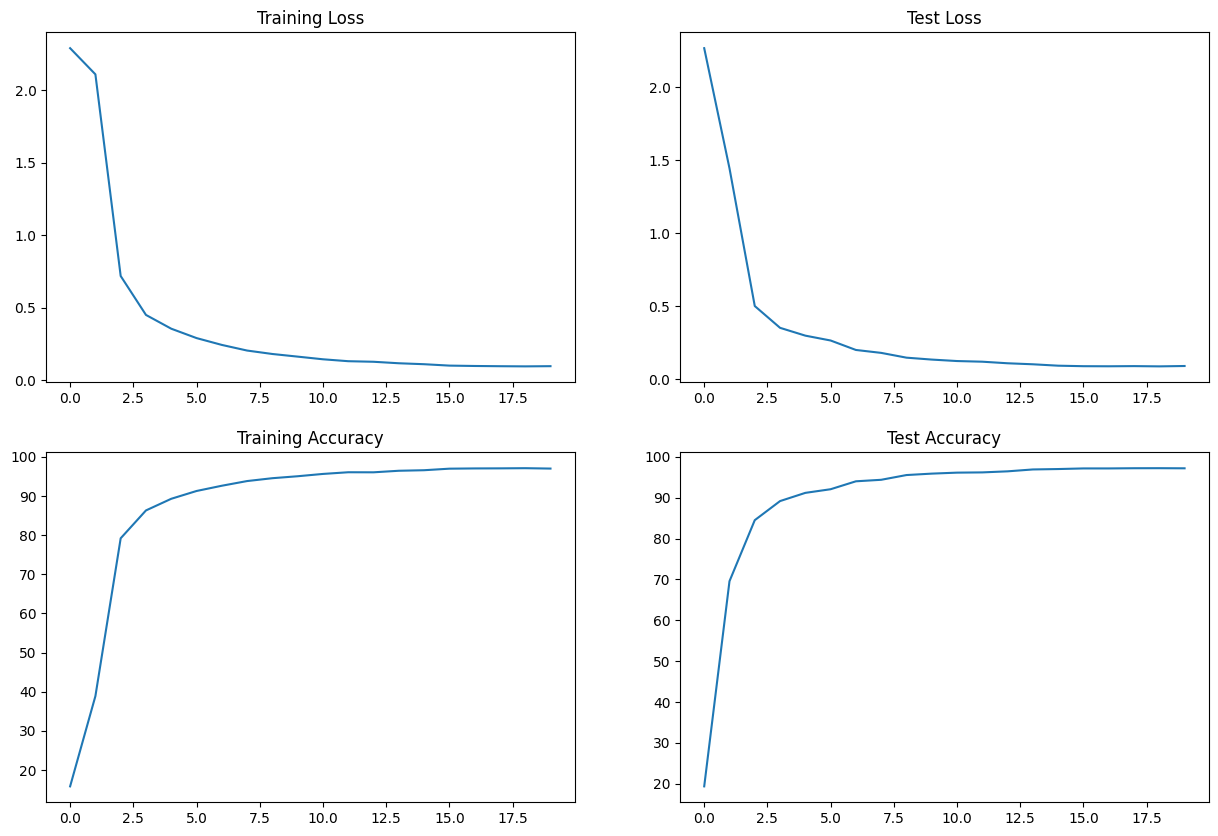

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 

torch.Size([2, 32, 26, 26])
 

torch.Size([2, 64, 12, 12])
 

torch.Size([2, 128, 10, 10])
 

torch.Size([2, 256, 4, 4])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
------------